First, let's import our libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import dill

In [59]:
if os.path.exists('notebook_ai.db'):
    dill.load_session('notebook_ai.db')

Dill is a module that will allow us to save the sessions of our jupyter notebook, so that every time the kernel restarts we can get back our variables without running all the file again.

In [3]:
sms_df = pd.read_csv("social_media_shares.csv")

# Exploratory Data Analysis (EDA)
1. Initial info about our dataset and first entries
2. Correlation Evaluation
3. Statistical info and shape of dataset
4. Distribution of the dependent variable


First, we take a look at the columns of our dataset and its first entries.

In [4]:
sms_df.columns

Index(['tokens_title', 'tokens_content', 'unique_tokens', 'non_stop_words',
       'non_stop_unique_tokens', 'hrefs', 'self_refs', 'imgs', 'videos',
       'token_length', 'keywords', 'lifestyle', 'entertainment', 'bus',
       'socmed', 'tech', 'world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_shares', 'monday', 'tuesday', 'wednesday',
       'thursday', 'friday', 'saturday', 'sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'subjectivity',
       'sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
    

In [5]:
sms_df.head(10)

,tokens_title,tokens_content,unique_tokens,non_stop_words,non_stop_unique_tokens,hrefs,self_refs,imgs,videos,token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,10,370,0.559889,1.0,0.698198,2,2,0,0,4.359459,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,8,960,0.418163,1.0,0.549834,21,20,20,0,4.654167,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,12,989,0.433574,1.0,0.572108,20,20,20,0,4.617796,...,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,11,97,0.670103,1.0,0.836735,2,0,0,0,4.855670,...,0.400000,0.8,-0.125000,-0.125,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,10,231,0.636364,1.0,0.797101,4,1,1,1,5.090909,...,0.100000,0.5,-0.238095,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,710


Now we want to evaluate correlations, given we have a lot of attributes this will help us understand dynamics better

In [6]:
sms_df.corr()

,tokens_title,tokens_content,unique_tokens,non_stop_words,non_stop_unique_tokens,hrefs,self_refs,imgs,videos,token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
tokens_title,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,-0.071403,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
tokens_content,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,0.167789,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
unique_tokens,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,0.026407,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
non_stop_words,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,0.031554,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
non_stop_unique_tokens,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,0.034185,...,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
hrefs,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,0.222588,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404
self_refs,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,0.126879,...,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709,-0.001900
imgs,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,0.033924,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.039388
videos,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,-0.002940,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.023936
token_length,-0.071403,0.167789,0.026407,0.031554,0.034185,0.222588,0.126879,0.033924,-0.002940,1.000000,...,0.222207,0.471383,-0.324529,-0.278784,-0.194660,-0.040406,-0.016718,0.026586,-0.036953,-0.022007


Most importantly, we want to evaluate correlation with respect to what we are interested in, so lets find the most and least correlated attributes with respect to shares, which is our dependent variable. This will tell us what is deterring and what is amplifying shares about our company's articles.

In [7]:
sms_df.corr().shares.sort_values()

LDA_02                         -0.059163
world                          -0.049497
avg_negative_polarity          -0.032029
token_length                   -0.022007
max_negative_polarity          -0.019300
min_negative_polarity          -0.019297
entertainment                  -0.017006
LDA_04                         -0.016622
tech                           -0.013253
rate_positive_words            -0.013241
bus                            -0.012376
LDA_01                         -0.010183
thursday                       -0.008833
tuesday                        -0.007941
rate_negative_words            -0.005183
friday                         -0.003884
wednesday                      -0.003801
LDA_00                         -0.003793
self_refs                      -0.001900
kw_min_min                     -0.001051
min_positive_polarity          -0.000040
non_stop_unique_tokens          0.000114
non_stop_words                  0.000443
global_rate_positive_words      0.000543
unique_tokens   

We see now that addition of self referencing shares, keywords, images and links could help us get more shares, while negative polarity and posting articles about entertainment or technology might make this number smaller.

Now we want some additional info that might help us understand our dataset better and its shape. 

In [8]:
sms_df.shape

(39644, 59)

In [9]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tokens_title                  39644 non-null  int64  
 1   tokens_content                39644 non-null  int64  
 2   unique_tokens                 39644 non-null  float64
 3   non_stop_words                39644 non-null  float64
 4   non_stop_unique_tokens        39644 non-null  float64
 5   hrefs                         39644 non-null  int64  
 6   self_refs                     39644 non-null  int64  
 7   imgs                          39644 non-null  int64  
 8   videos                        39644 non-null  int64  
 9   token_length                  39644 non-null  float64
 10  keywords                      39644 non-null  int64  
 11  lifestyle                     39644 non-null  int64  
 12  entertainment                 39644 non-null  int64  
 13  b

This is telling us that we have 58 attributes (59 minus id column), and a total of 39644 entries (or rows), additionally we have found out that there are no categorical attributes, but binary ons instead, we also have an abundance of floats and some integers, with no null values.

In [10]:
display(sms_df.describe())

,tokens_title,tokens_content,unique_tokens,non_stop_words,non_stop_unique_tokens,hrefs,self_refs,imgs,videos,token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


This is statistical information, which is useful but hard to evaluate on all attributes, lets try with only shares.

In [11]:
sms_df.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

Now we plot a histogram about shares and the amount of times a number of shares appears on an article

<function matplotlib.pyplot.show(close=None, block=None)>

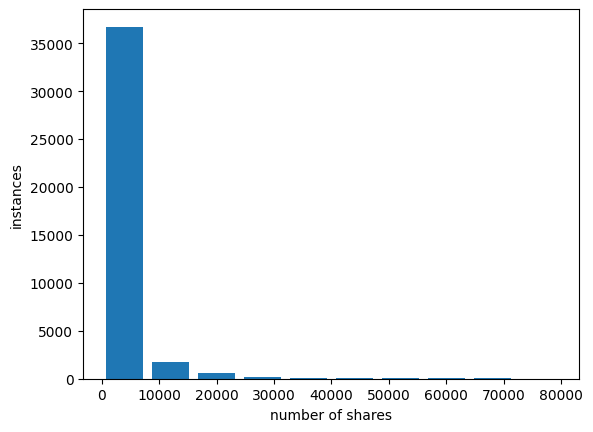

In [12]:
plt.hist(sms_df.shares,range=(-100,80000),rwidth=0.8)
plt.xlabel("number of shares")
plt.ylabel("instances")
plt.show

It is very clear that we have a huge number of average shares articles, since around 90% of articles have less than 10K shares. This is leaving a lot of room for outliers. An article with a higher number of shares happens very rarely, so we will have to slice our dataset accordingly when removing outliers in the future, when we will be in the process of preparing our dataset for regression. Now lets print something to back up our claims

In [13]:
sms_df[sms_df.shares > 20000].count().shares 

818

Articles with more than 20.000 shares are 818, an abysmal number considering our dataset has almost 40.000 entries, of course as the number of shares on an article goes up, the number of articles who get near to that value will always be smaller.

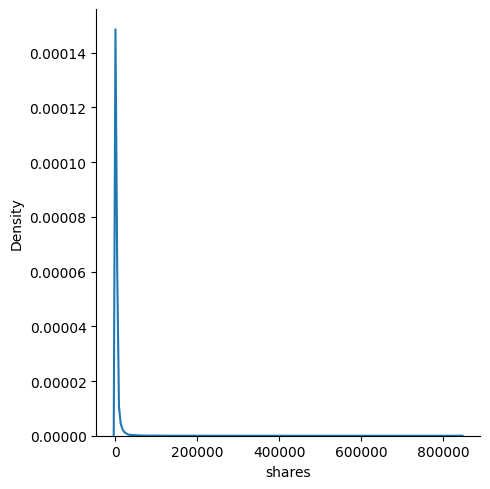

In [14]:
sns.displot(sms_df, x="shares", kind="kde")

Subsequently, after plotting more clearly the distribution of shares, we can confirm that it is a very dense distribution, we cannot consider it normally distributed, if we really wanted to we could see it as bell-shaped, but with a bell that is very small in width and right skewed.

# Removing outliers

### Identifying categorical variables

In our case, the categorical variables are the only variables which take only 0 and 1 as values, so this is enough to identify them. Categorical variables don't have outliers so we'll not consider them in this section, that's the reason behind identifying them. However, we'll make sure that there are no errors in the dataset concerning these variables, we will check for rows having values different than 0 and 1 for categorical attributes and delete them from the dataset

In [15]:
cols = sms_df.columns
categ = []
for i in cols:
    values_set = set(sms_df[i].values)
    if values_set == {0,1}:
        categ.append(i)

The categorical variables are:

In [16]:
categ

['lifestyle',
 'entertainment',
 'bus',
 'socmed',
 'tech',
 'world',
 'monday',
 'tuesday',
 'wednesday',
 'thursday',
 'friday',
 'saturday',
 'sunday',
 'is_weekend']

Now we check for rows having wrong values for categorical variables:

In [17]:
sms_df.shape

(39644, 59)

In [18]:
for i in categ:
    index = sms_df[(sms_df[i] != 0)&(sms_df[i] != 1)].index
    sms_df.drop(index, inplace=True)

In [19]:
sms_df.shape

(39644, 59)

As we can see, the number of rows of our dataset is unchanged, which means all lines had correct values.

### Removing outliers from independent variables

Now, let's take a look at the distributions of the independent variables:

C:\Users\chaki\AppData\Local\Temp\ipykernel_115140\454069336.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<function matplotlib.pyplot.show(close=None, block=None)>

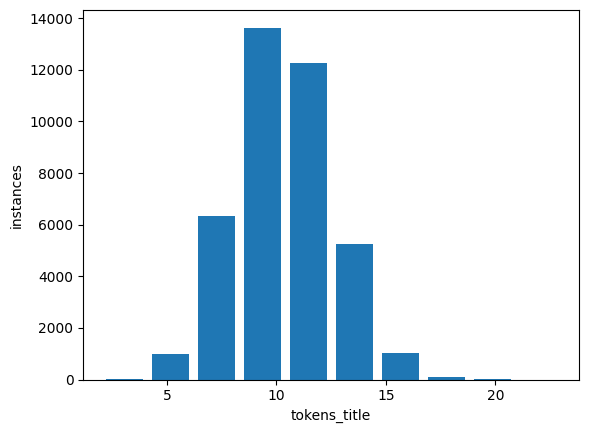

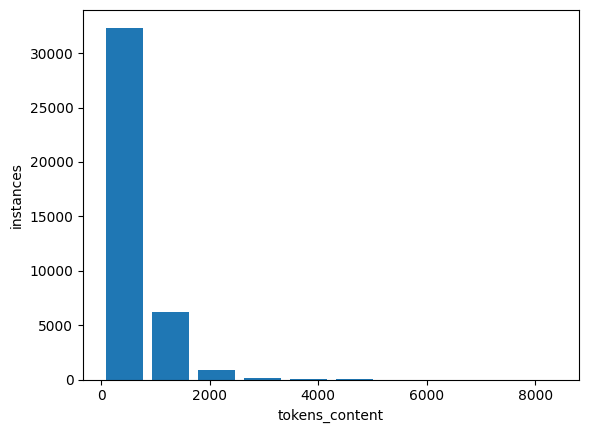

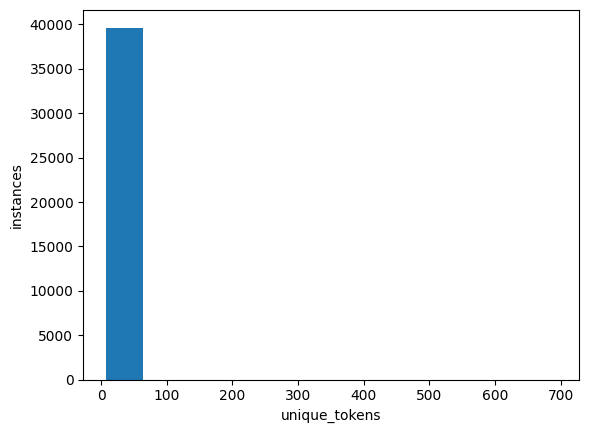

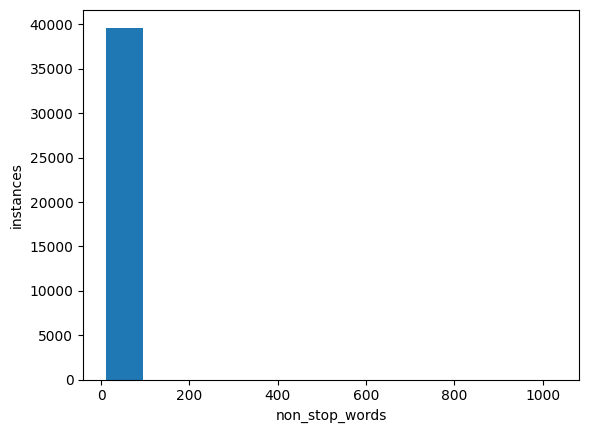

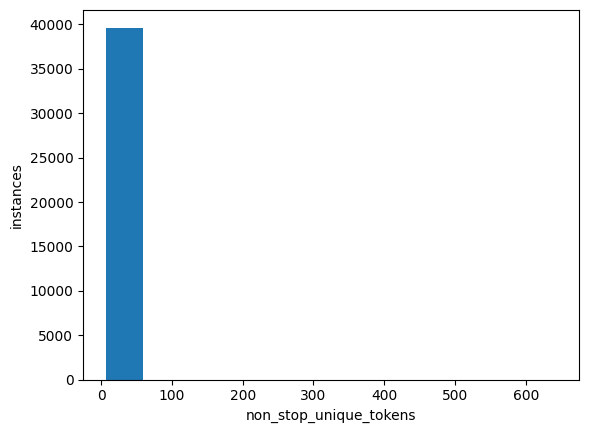

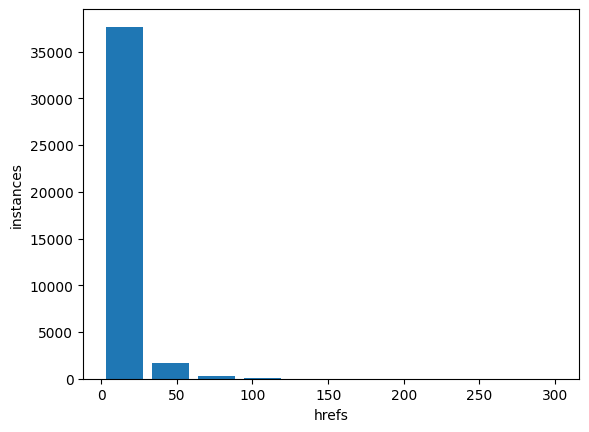

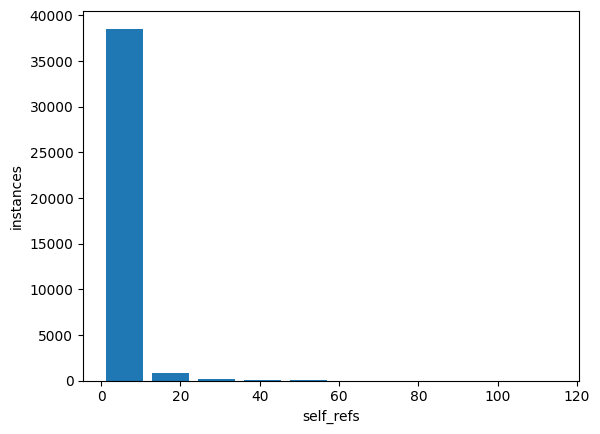

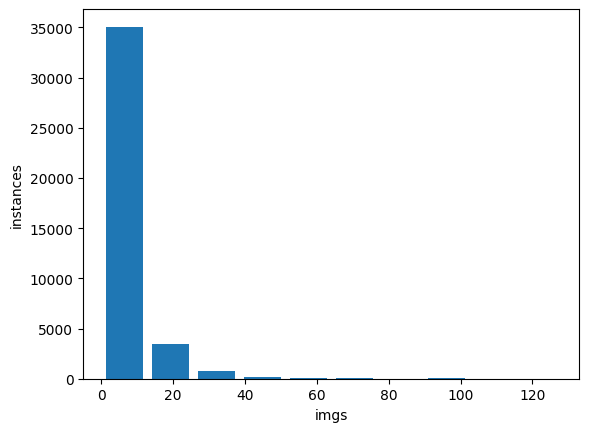

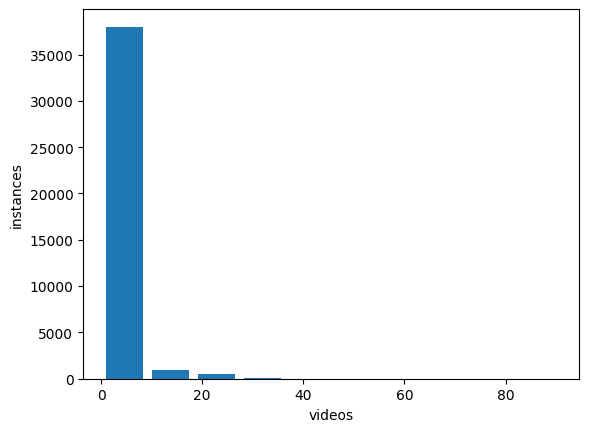

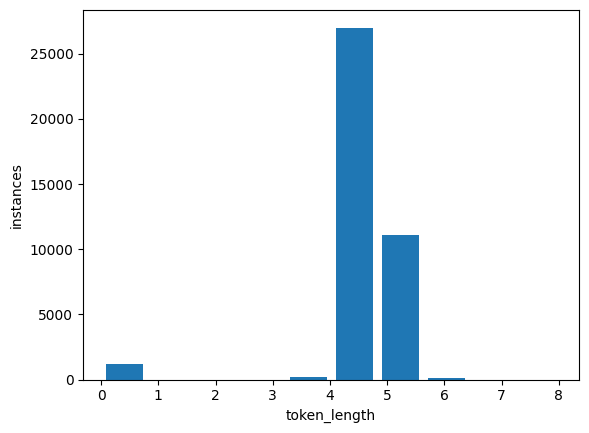

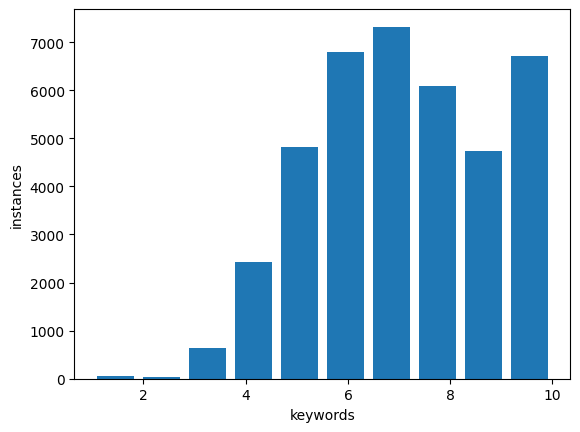

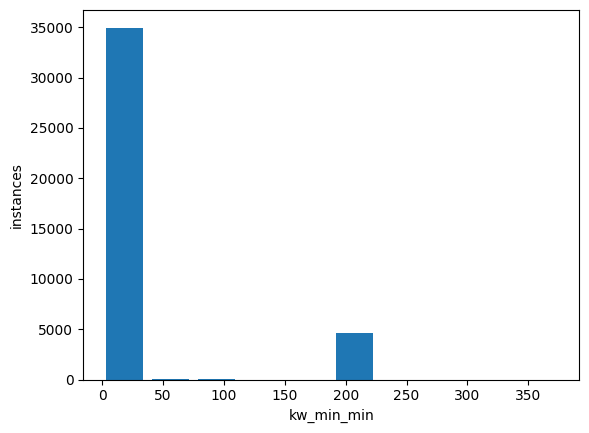

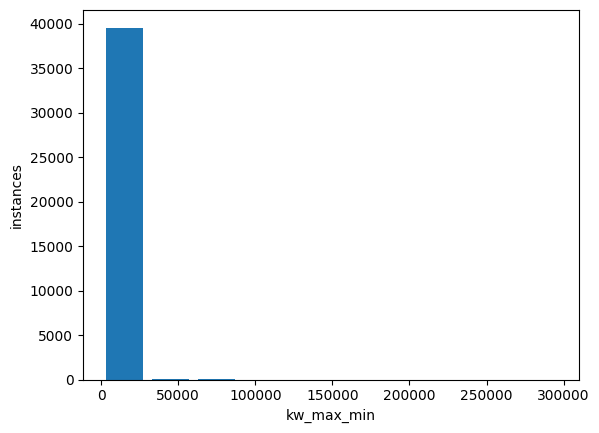

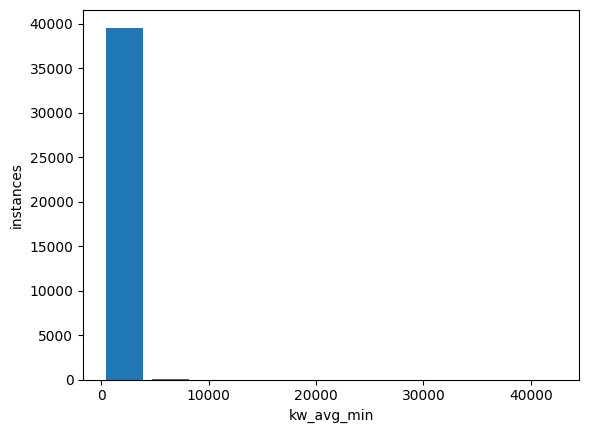

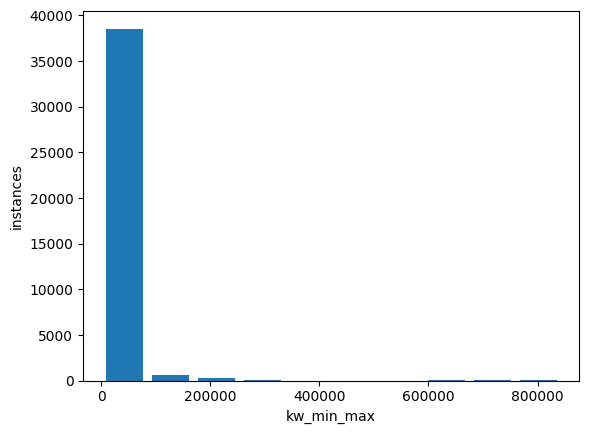

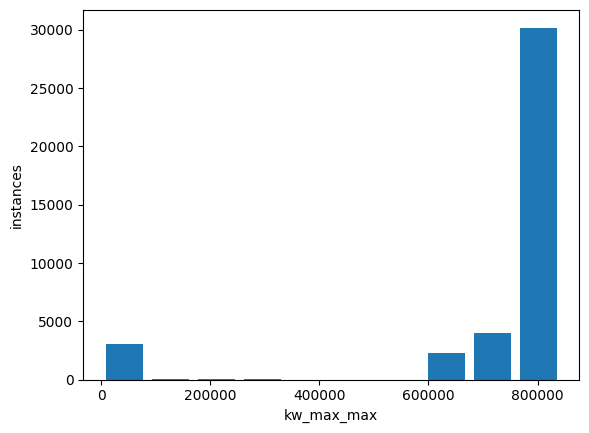

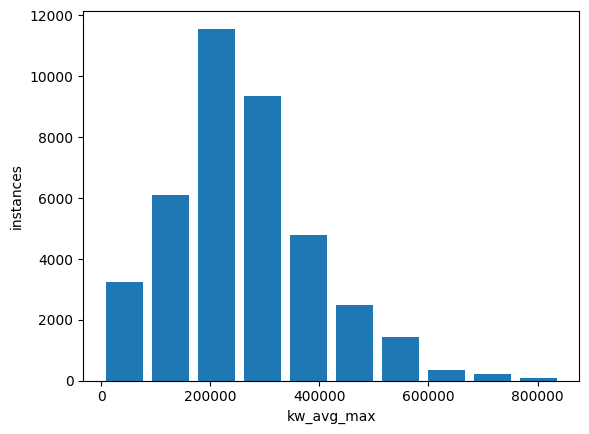

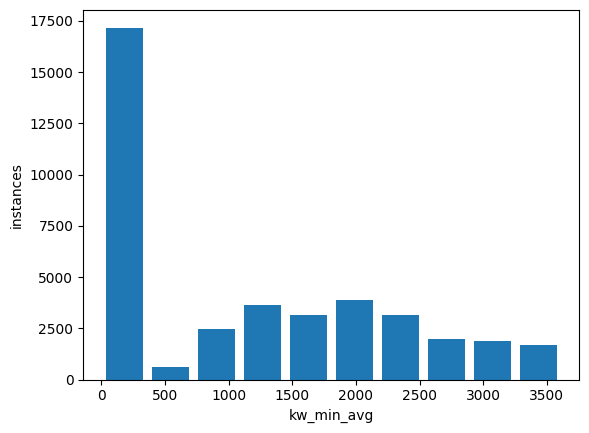

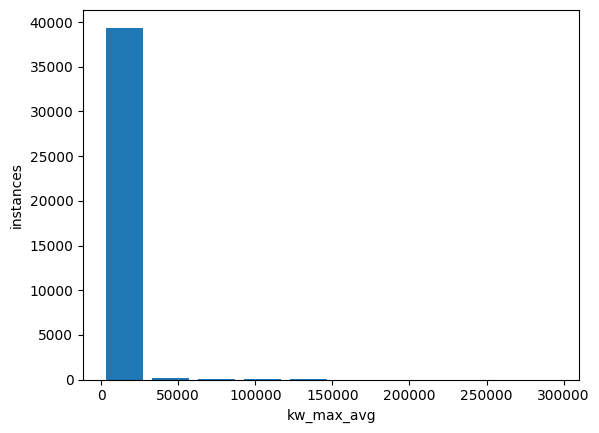

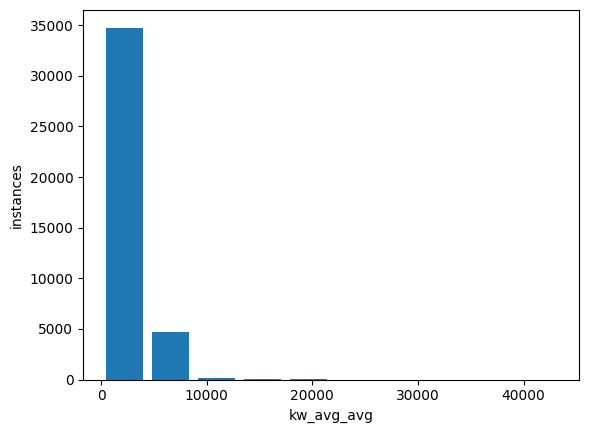

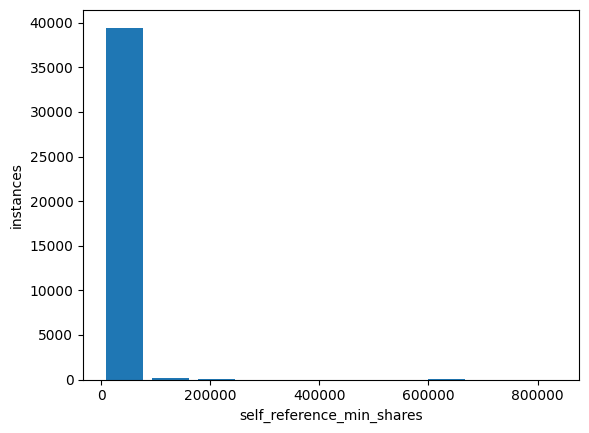

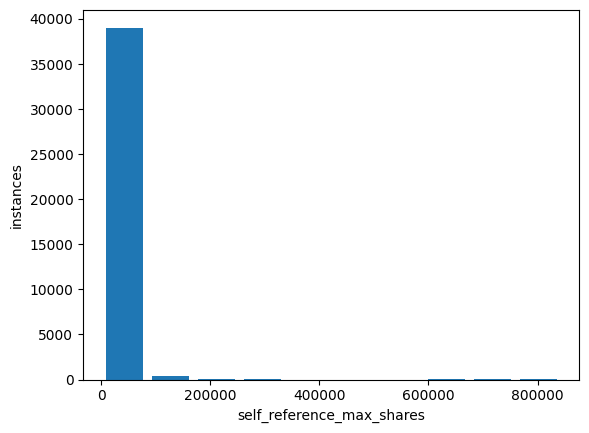

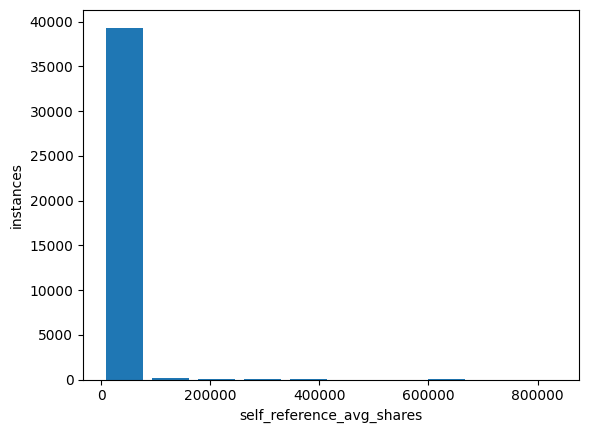

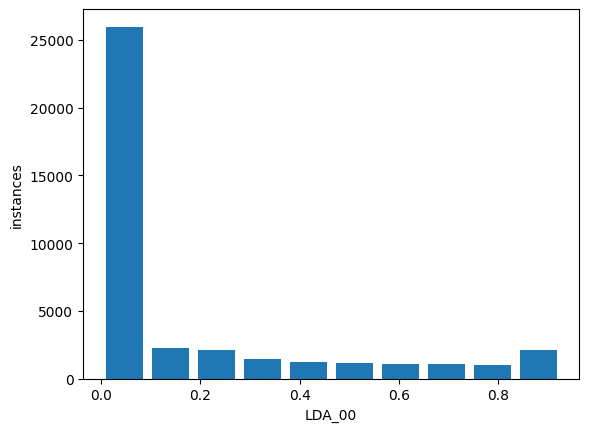

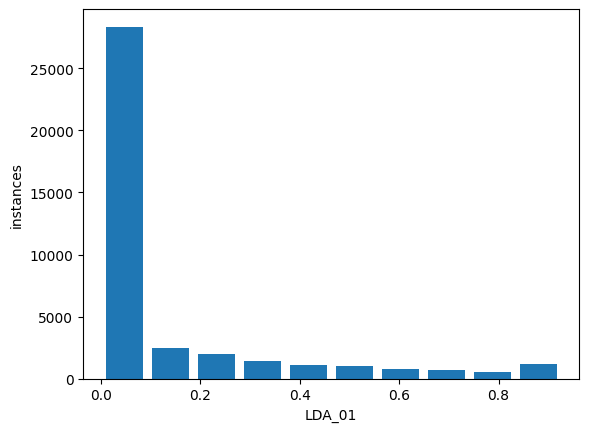

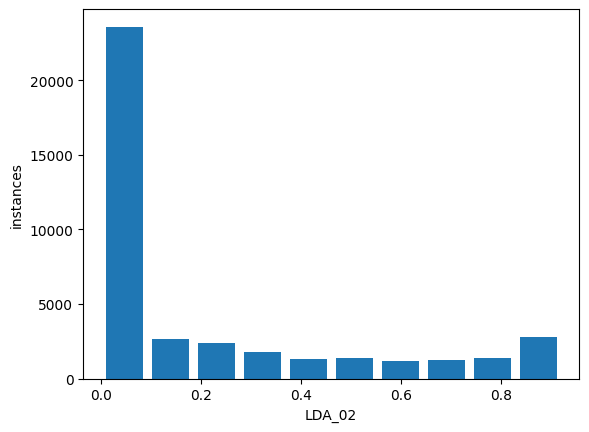

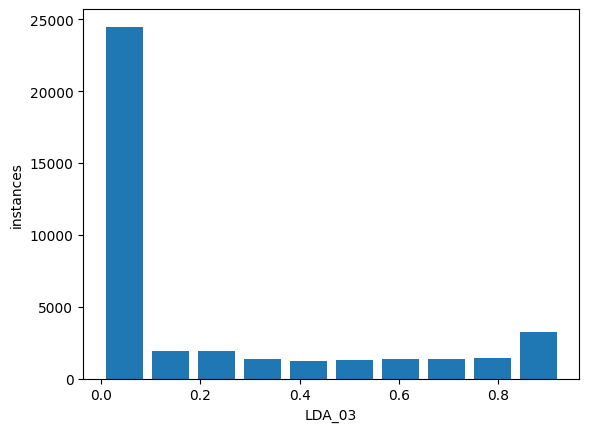

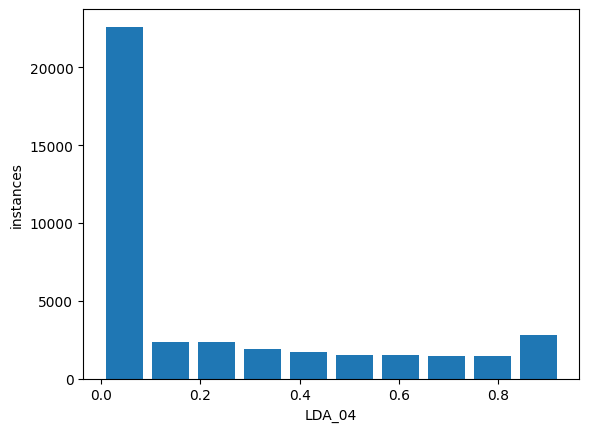

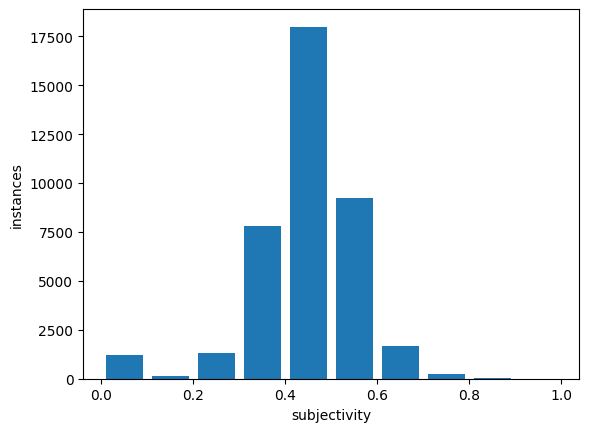

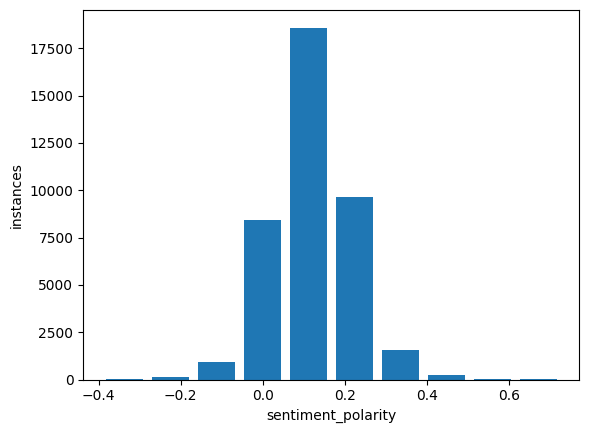

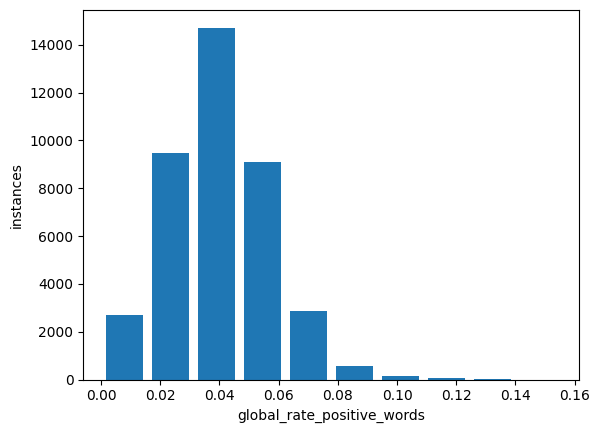

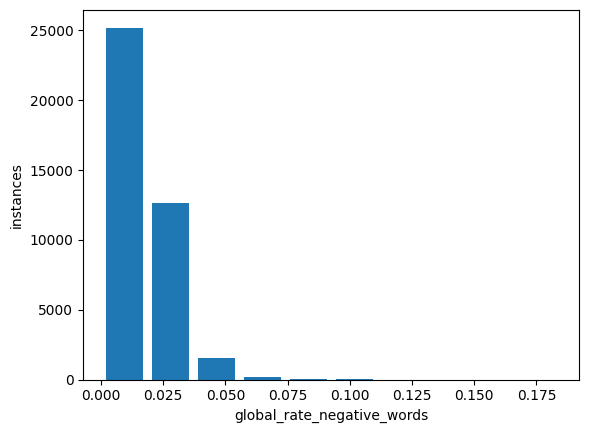

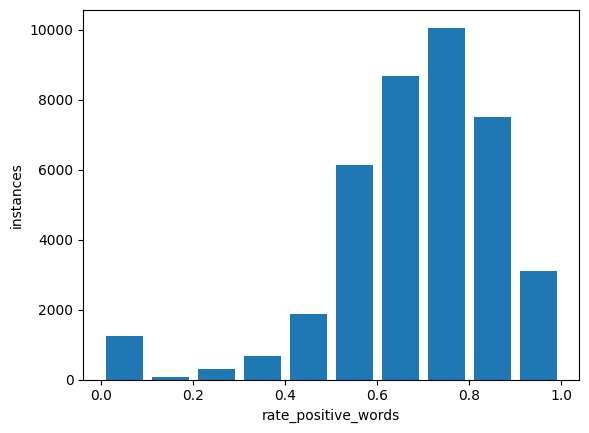

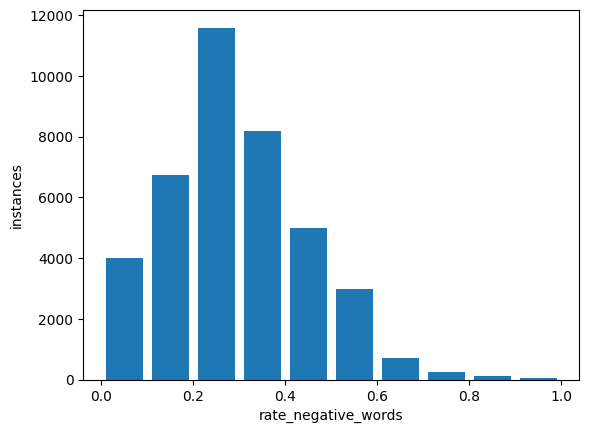

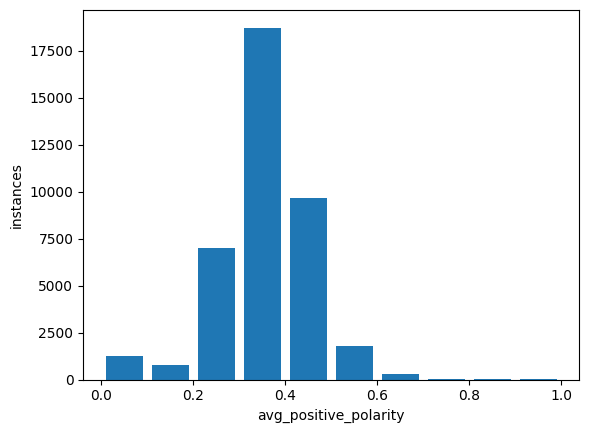

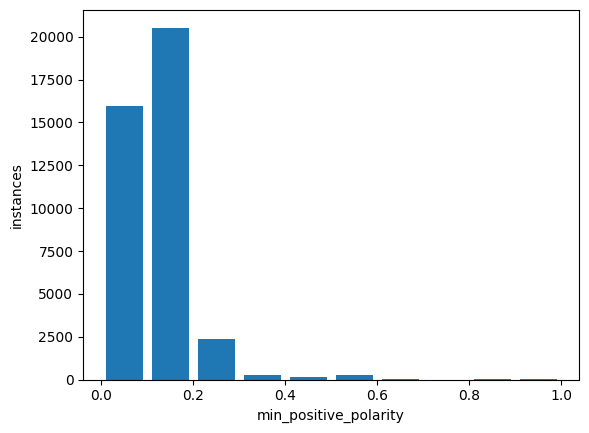

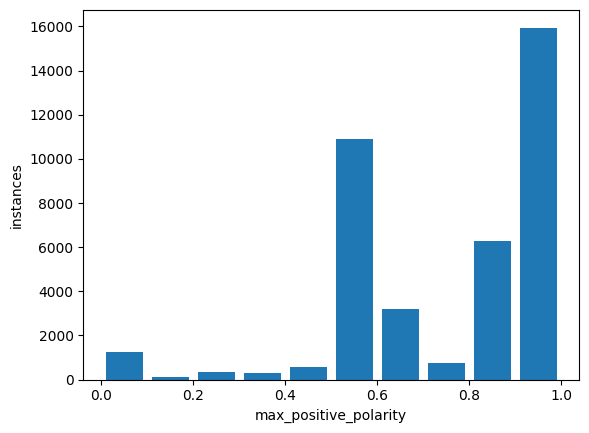

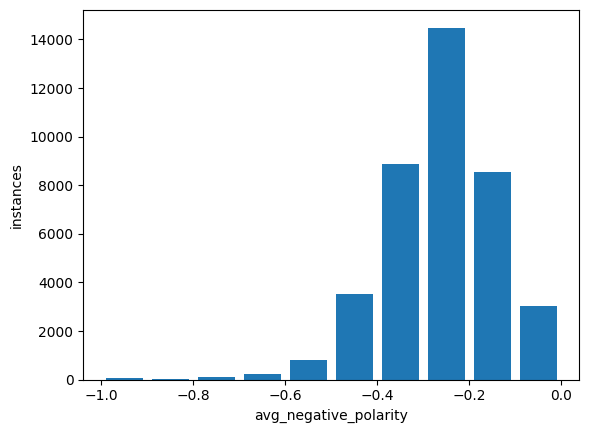

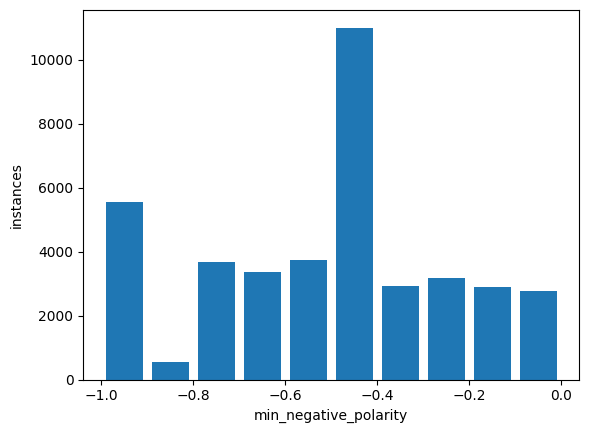

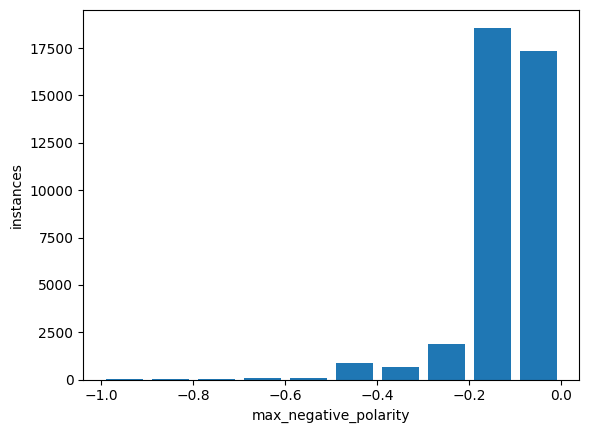

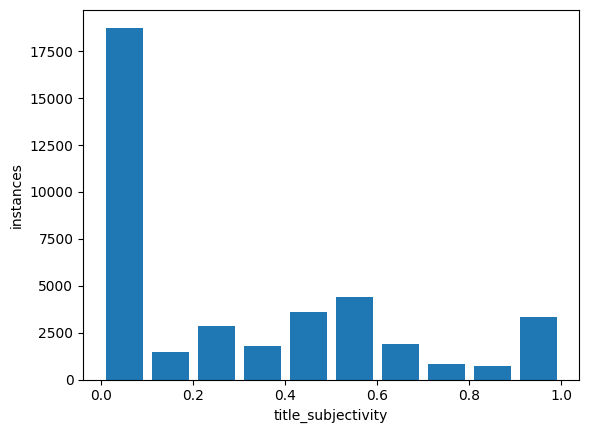

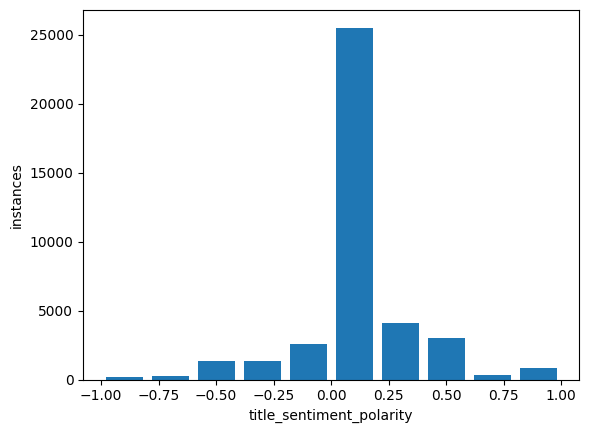

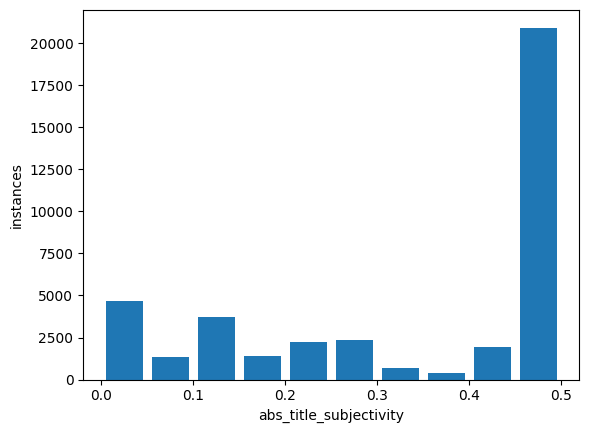

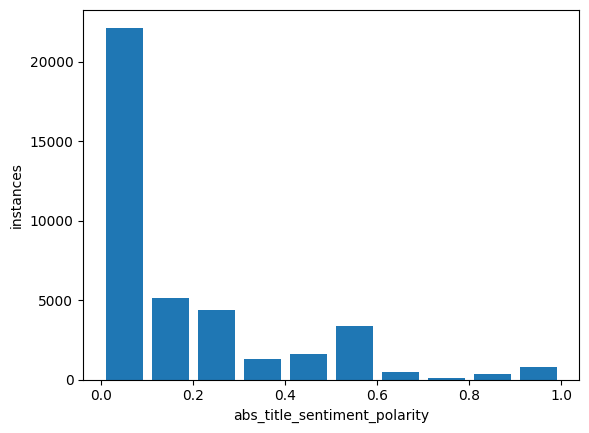

In [20]:
for i in cols[:-1]:
    if i not in categ:
        plt.figure()
        plt.hist(sms_df[i], range=(min(sms_df[i]), max(sms_df[i])),rwidth=0.8)
        plt.xlabel(i)
        plt.ylabel("instances")
plt.show

We can also compute the skewness for each variable:

In [21]:
for i in cols:
    print(i, ": ", sms_df[i].skew())

tokens_title :  0.16532037674928027
tokens_content :  2.9454219387867084
unique_tokens :  198.65511559825592
non_stop_words :  198.7924453768874
non_stop_unique_tokens :  198.44329440926512
hrefs :  4.013494828201318
self_refs :  5.172751105757634
imgs :  3.9465958446535474
videos :  7.0195327862958665
token_length :  -4.57601155020474
keywords :  -0.14725125199950523
lifestyle :  3.9930191433554167
entertainment :  1.68358480940472
bus :  1.8768701859879158
socmed :  3.758879630973088
tech :  1.6199757646890423
world :  1.4051693841208097
kw_min_min :  2.3749472801825444
kw_max_min :  35.32843373115432
kw_avg_min :  31.306108102660584
kw_min_max :  10.386371634782769
kw_max_max :  -2.6449817621966782
kw_avg_max :  0.6243096463608944
kw_min_avg :  0.4679758464905322
kw_max_avg :  16.41166955537124
kw_avg_avg :  5.760177291618559
self_reference_min_shares :  26.264364160300094
self_reference_max_shares :  13.870849049433598
self_reference_avg_shares :  17.9140933776756
monday :  1.77590

We notice that most of the variables have long tailed skewed distributions, the long tails represent observations that have strange values, these values might be result of very specific and extreme cases, or they can result from an error in writing down the data. In order to use these values in our model we should have a bigger number of observations (more data) that is why we will not consider them in our case, especially when it comes to variables having light tailed distributions as this means that the points taking those values are not many, there for we will consider them as outliers.

On the other hand, there's a minority of variables having bell-shaped distributions. These distributions will be corrected just by replacing a small proportion of extreme values (smaller than 0.005-quantile and bigger than 0.995-quantile) and possible outliers by the median value.

##### Treating of variables having bell-shaped distributions:

By analysing the distributions and the skewness values above, we notice that the variables having distributions similar to a Gaussian have skewness values between -0.2 and 0.2

Using this result, we will plot the variables in question:

<function matplotlib.pyplot.show(close=None, block=None)>

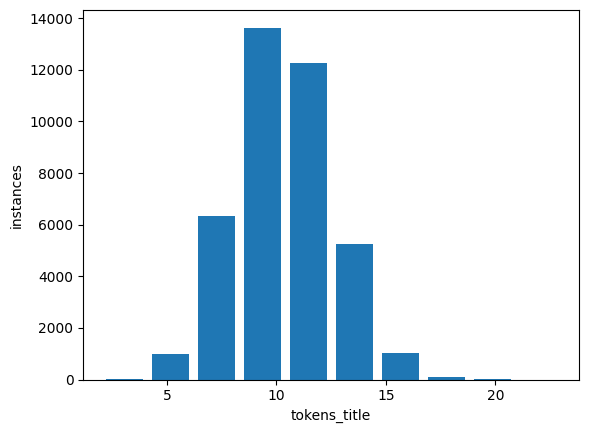

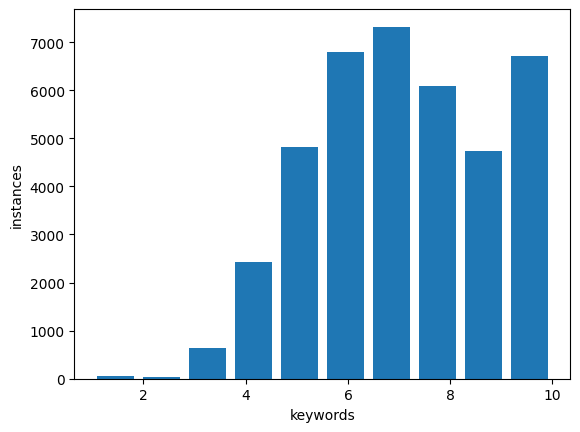

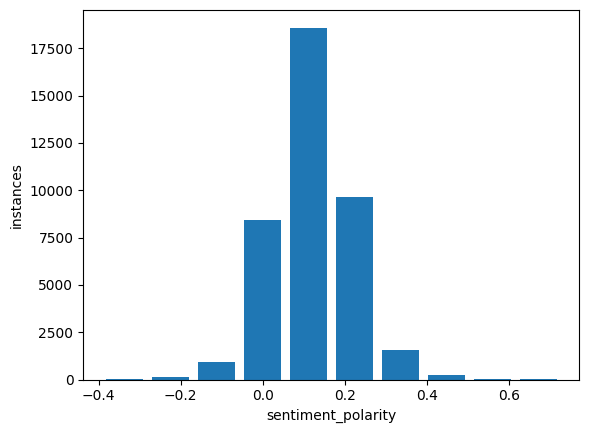

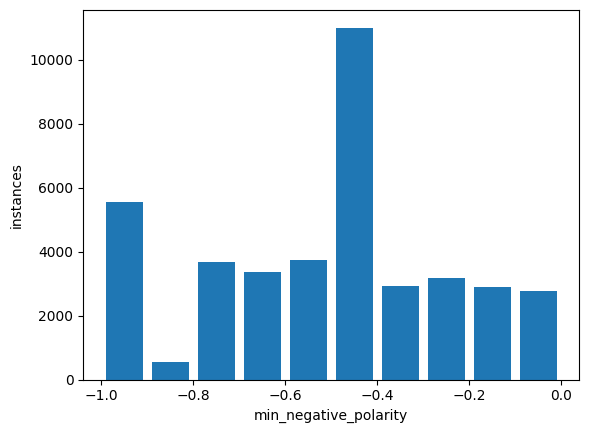

In [22]:
gauss = []
for i in cols[:-1]:
    if i not in categ and -0.2<=sms_df[i].skew()<=0.2: 
        gauss.append(i)
        plt.figure()
        plt.hist(sms_df[i], range=(min(sms_df[i]), max(sms_df[i])),rwidth=0.8)
        plt.xlabel(i)
        plt.ylabel("instances")
plt.show

Now we correct the distributions and we plot them again to see the results:

<function matplotlib.pyplot.show(close=None, block=None)>

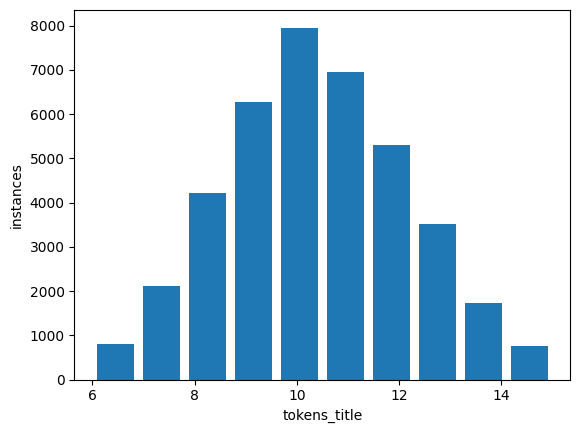

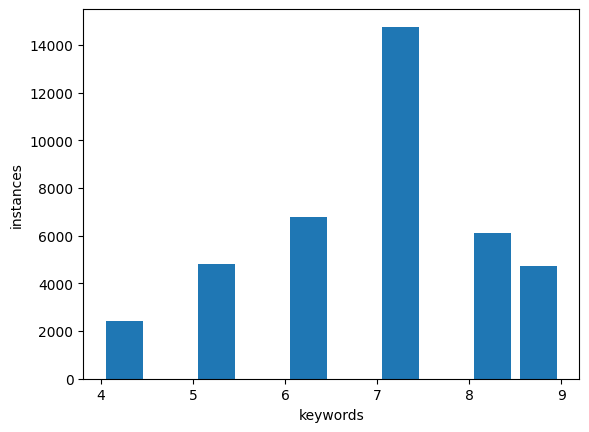

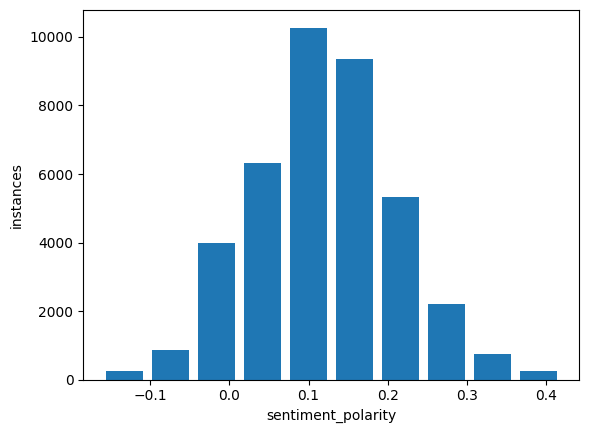

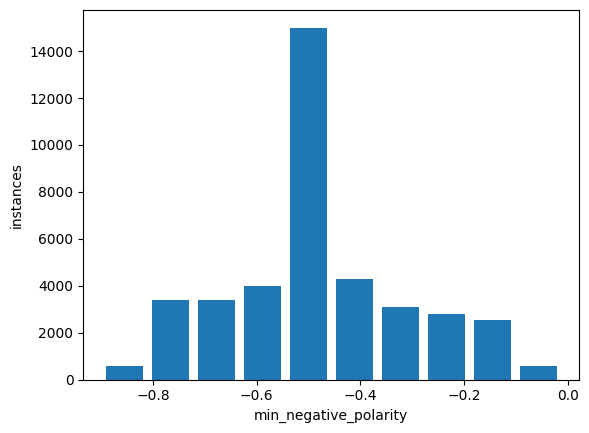

In [23]:
for i in gauss:
    Q1 = sms_df[i].quantile(0.005)
    Q2 = sms_df[i].quantile(0.5)
    Q3 = sms_df[i].quantile(0.995)
    sms_df[i] = np.where((sms_df[i] >= Q3)|(sms_df[i] <= Q1), Q2, sms_df[i])
    plt.figure()
    plt.hist(sms_df[i], range=(min(sms_df[i]), max(sms_df[i])),rwidth=0.8)
    plt.xlabel(i)
    plt.ylabel("instances")
plt.show

We can see that the distributions are better now, especially for the variables `keywords` and `min_negative_polarity` which had bimodal or even multimodal distributions before the treatment, but now the distributions are unimodal.

##### Treating of variables having long-tailed/skewed distributions

We visualise the distributions of the variables in question

C:\Users\chaki\AppData\Local\Temp\ipykernel_115140\3539561104.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<function matplotlib.pyplot.show(close=None, block=None)>

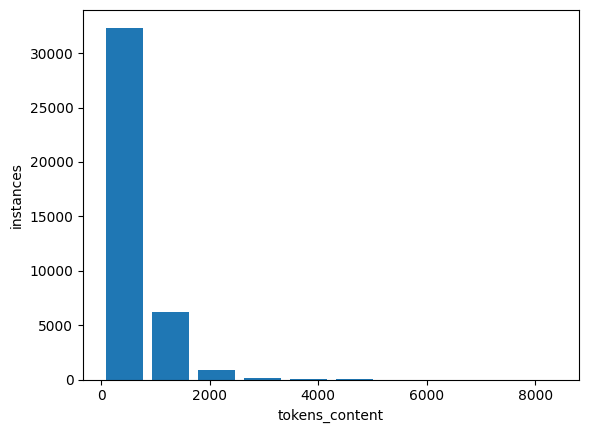

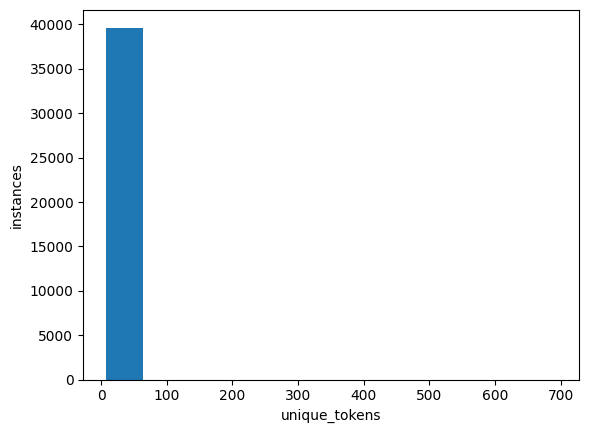

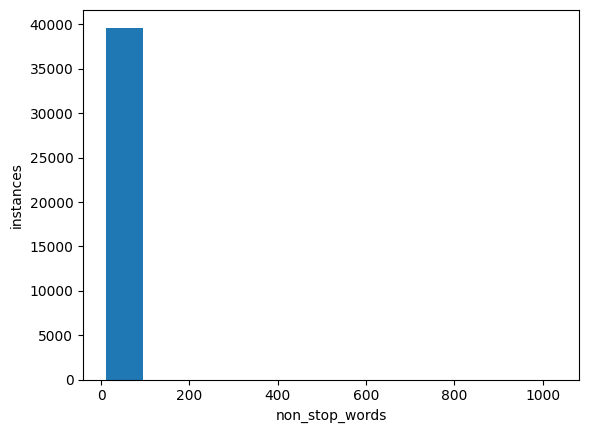

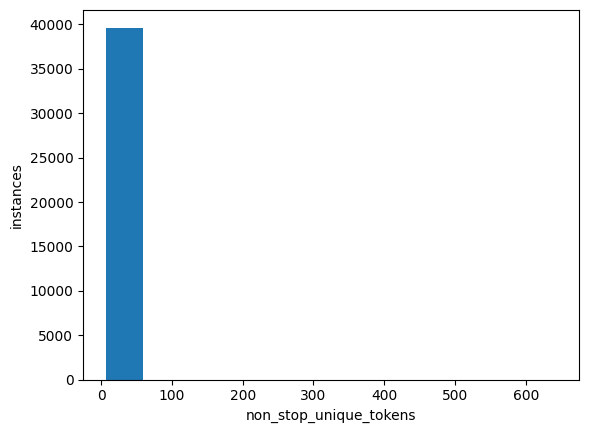

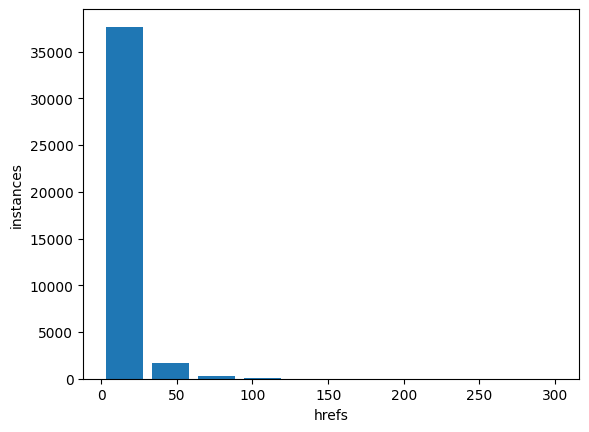

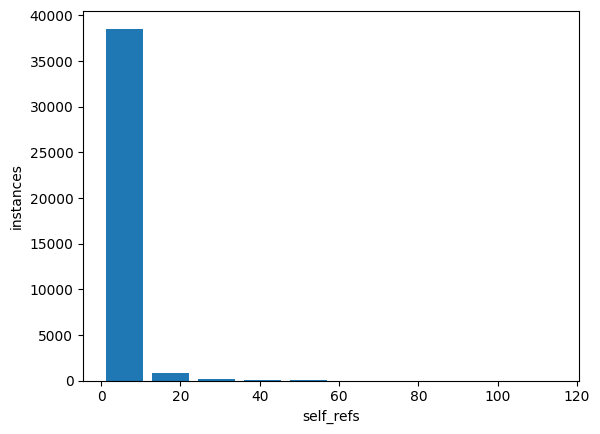

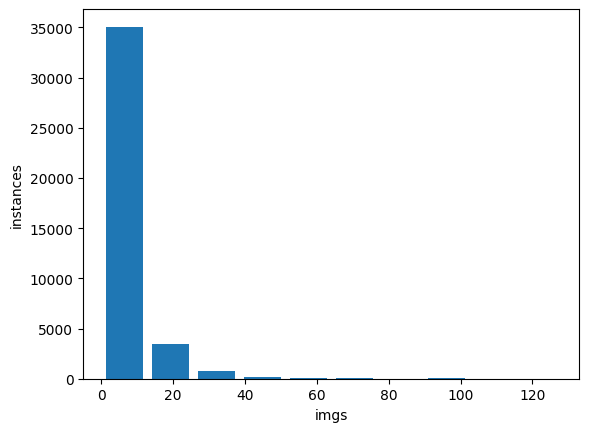

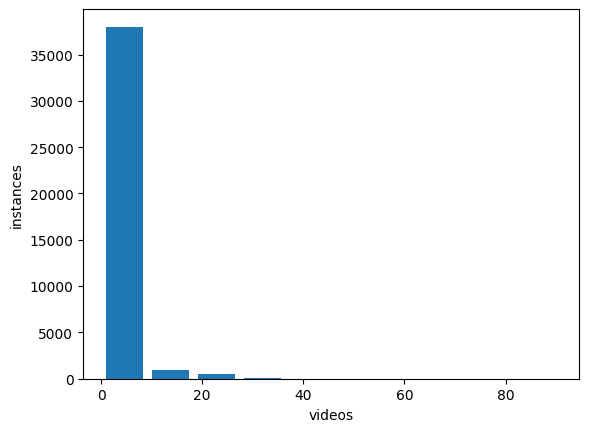

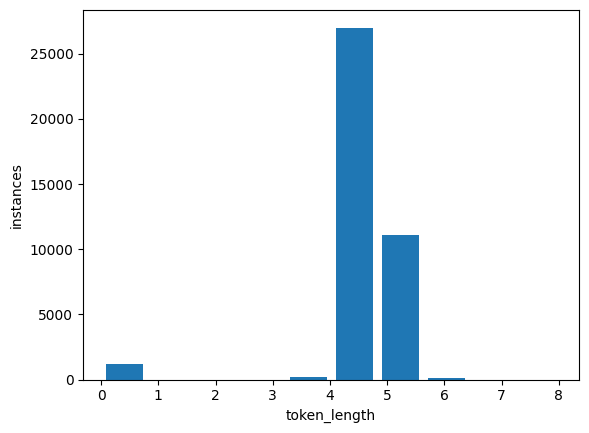

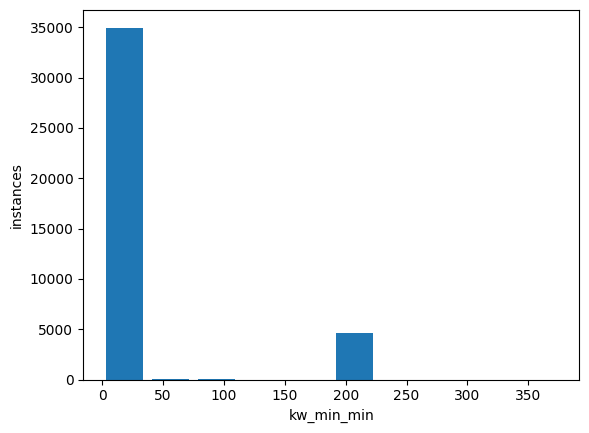

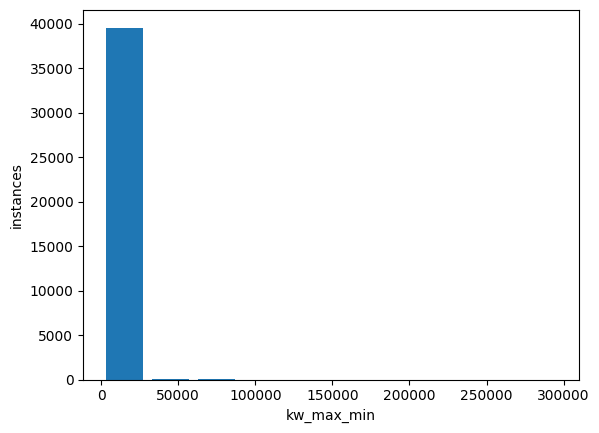

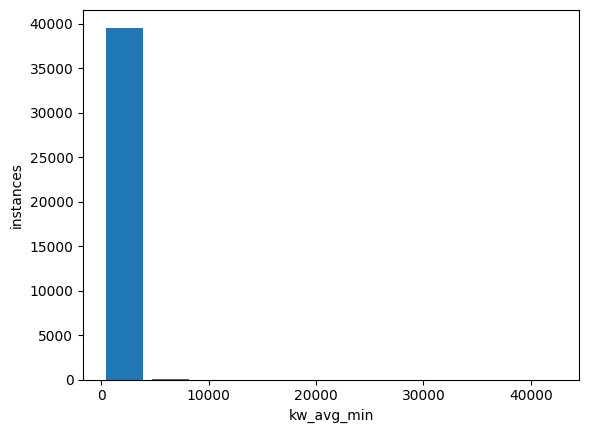

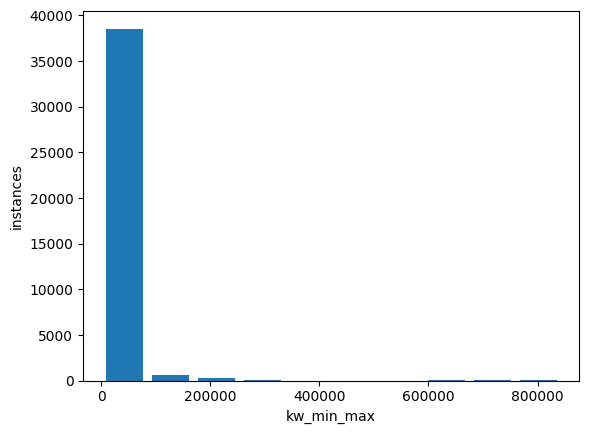

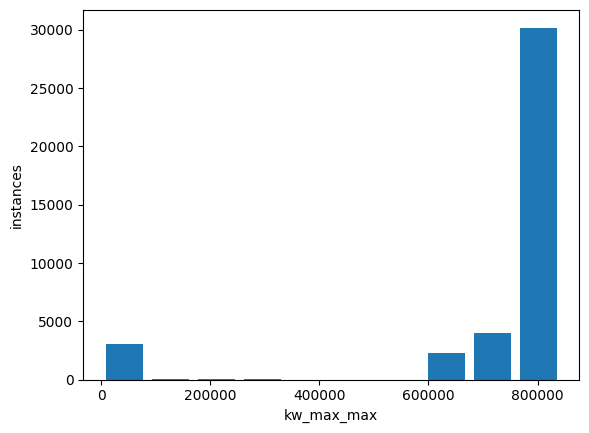

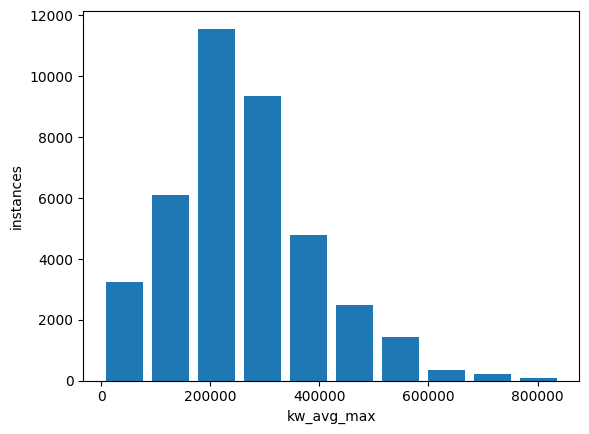

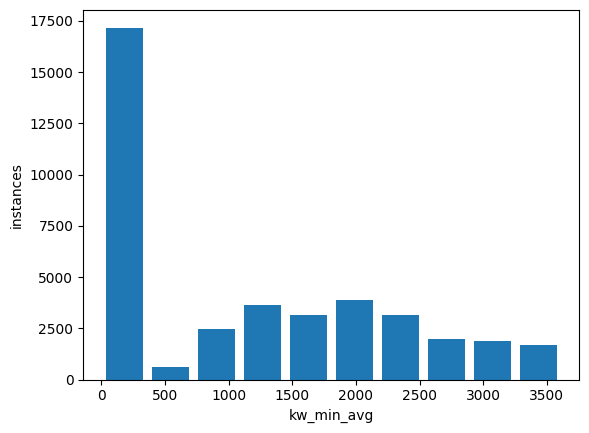

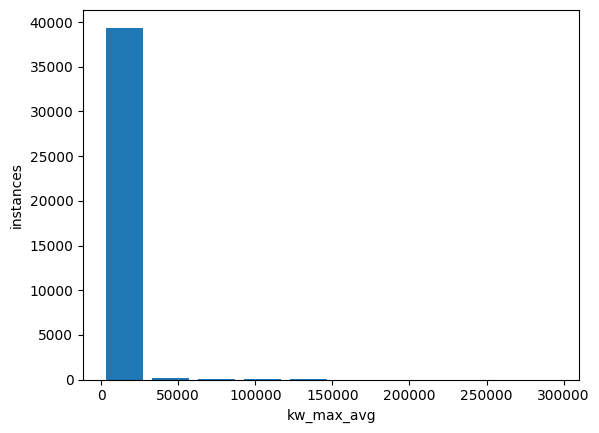

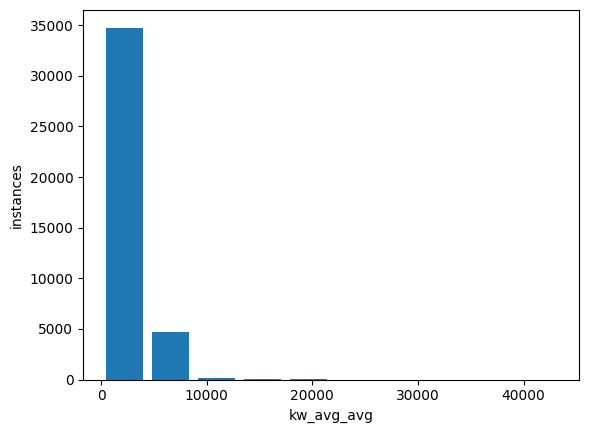

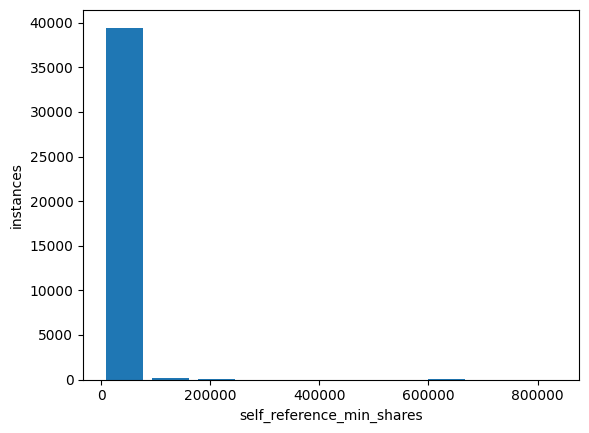

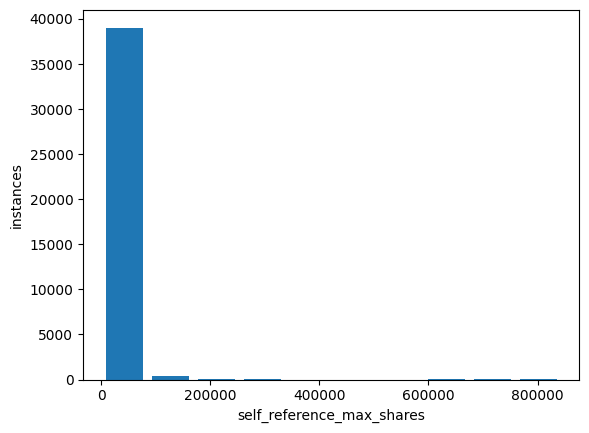

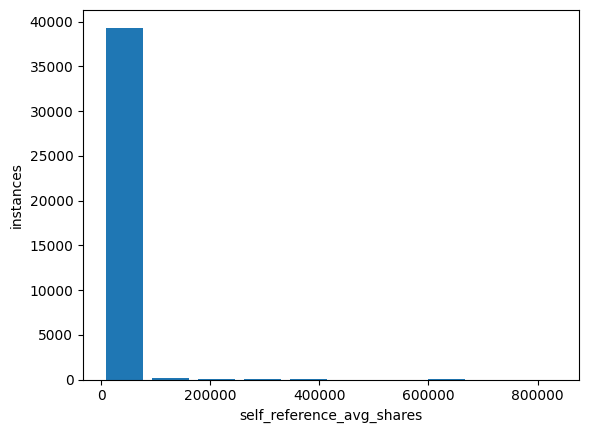

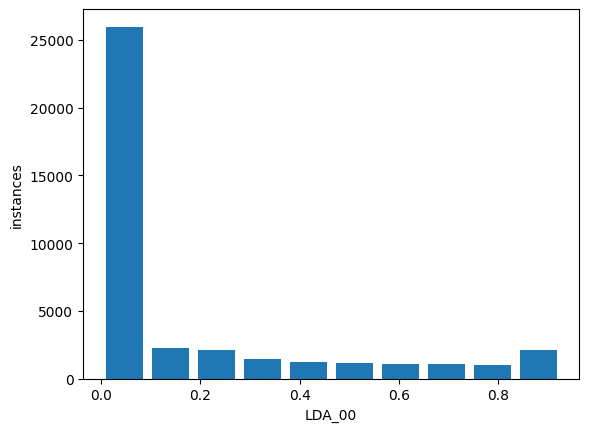

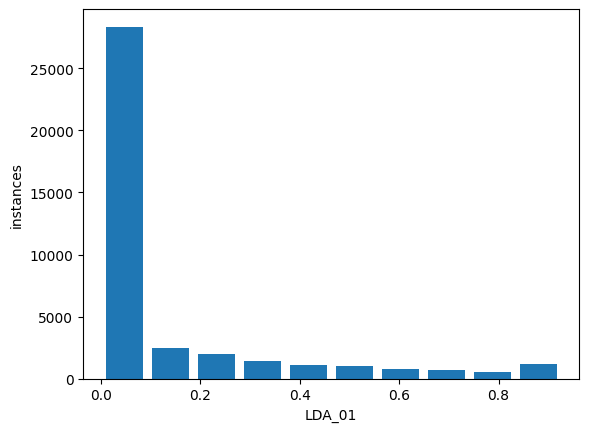

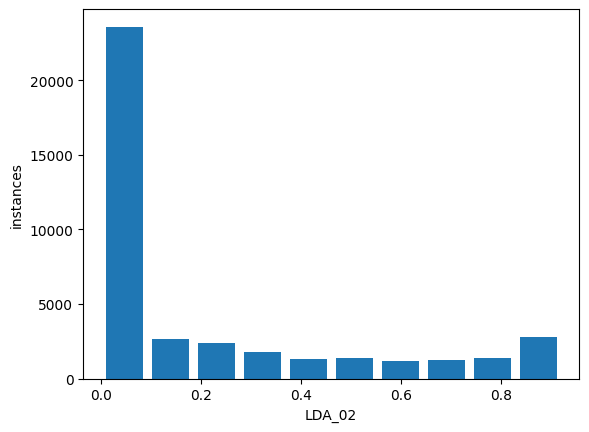

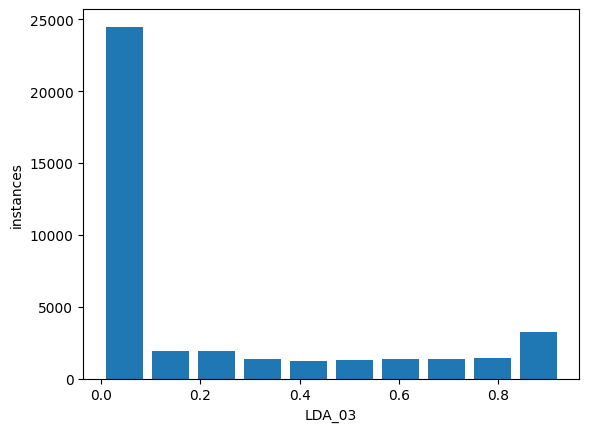

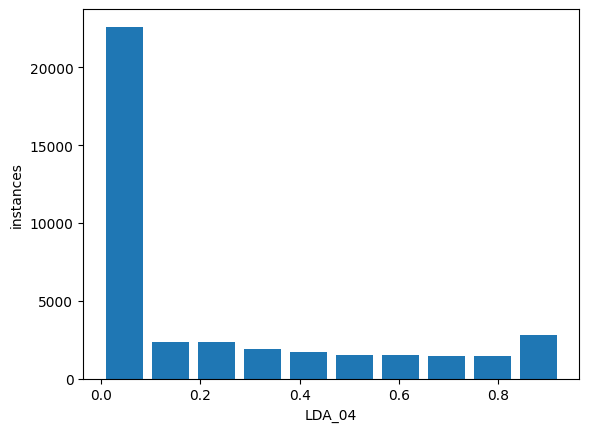

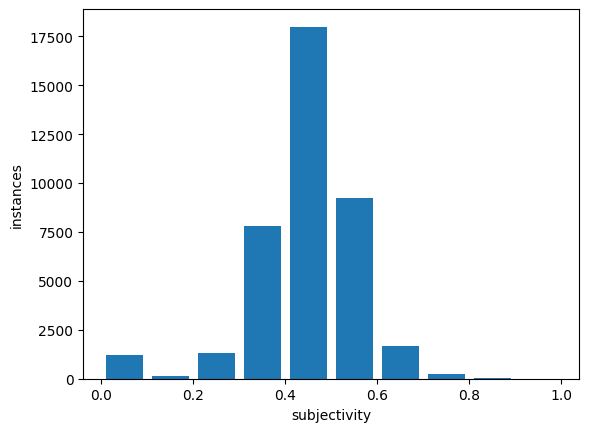

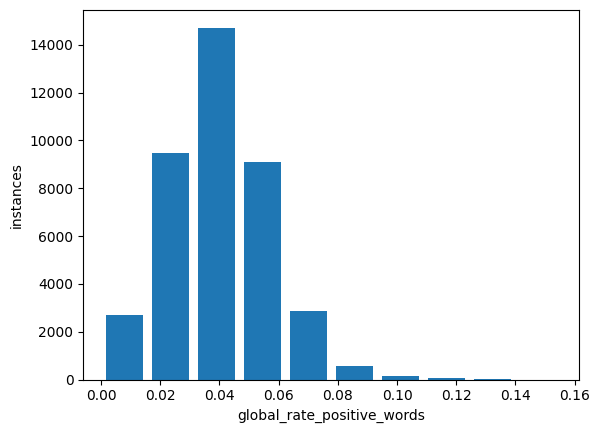

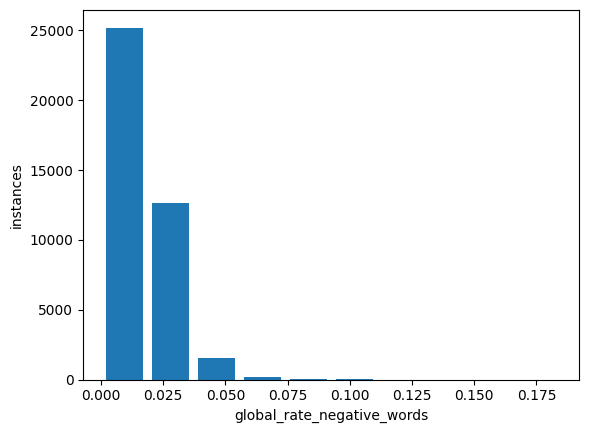

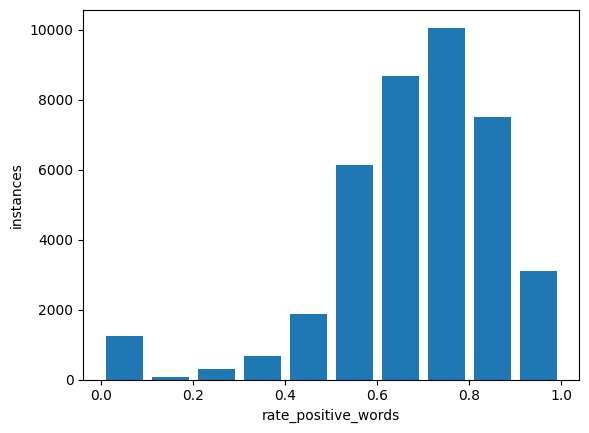

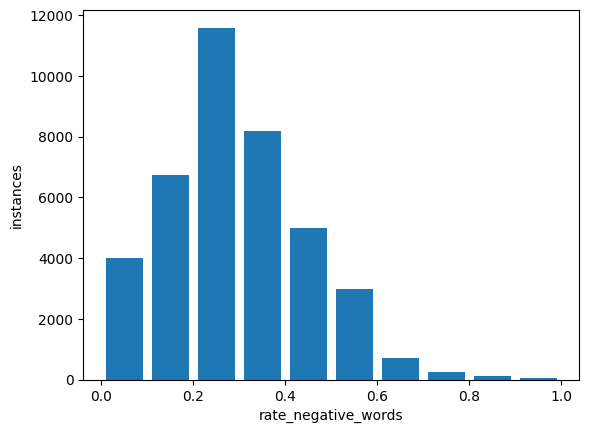

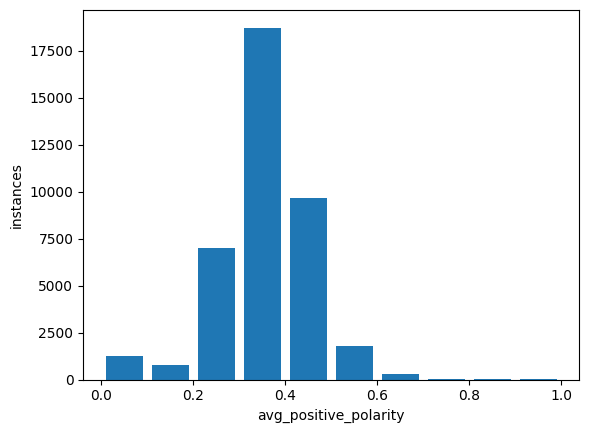

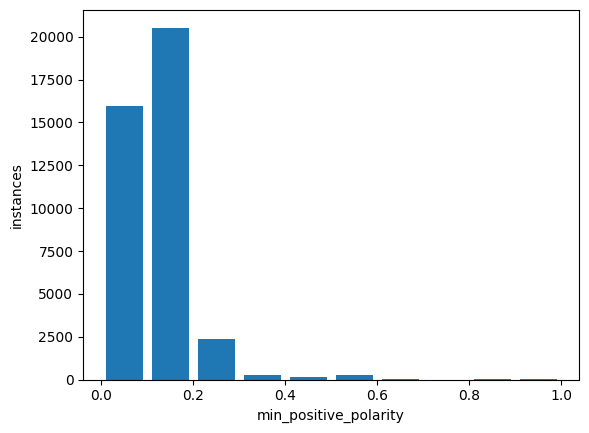

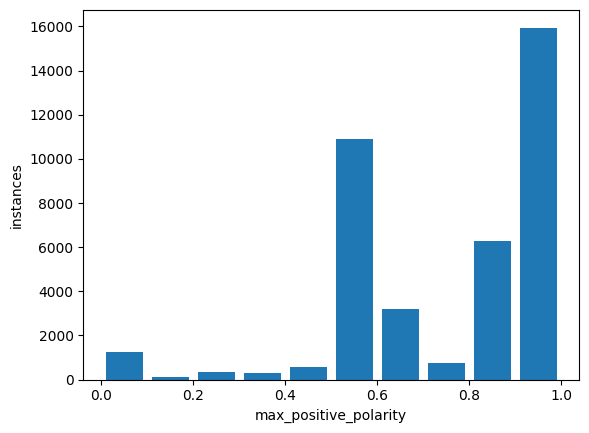

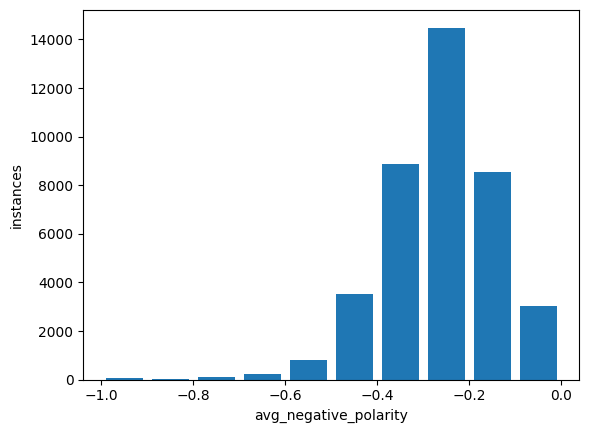

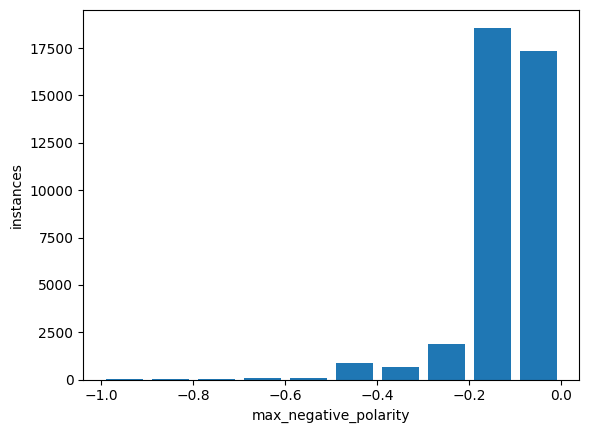

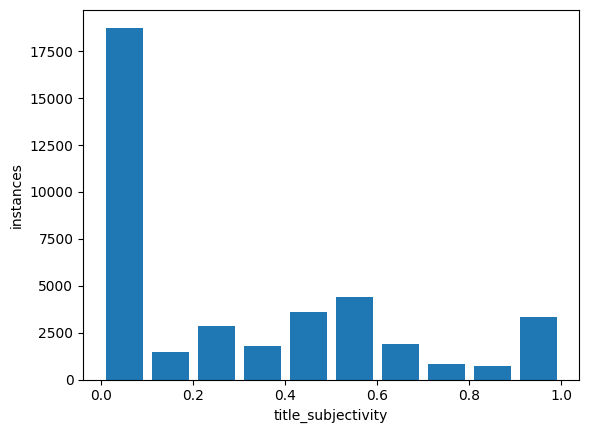

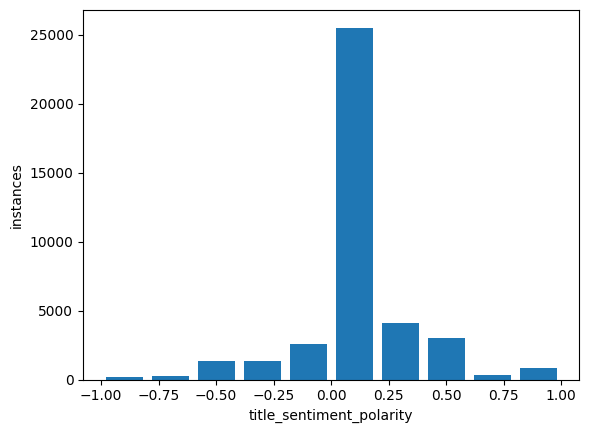

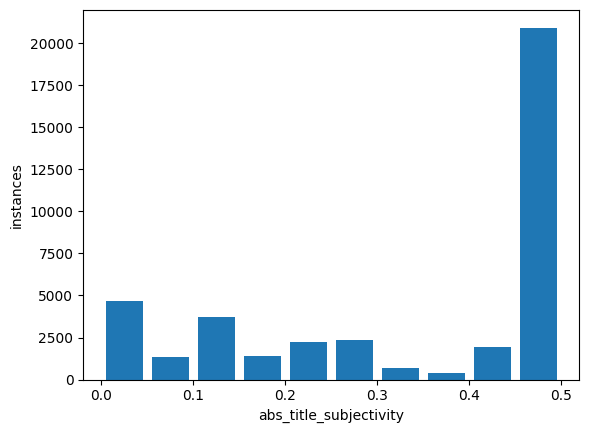

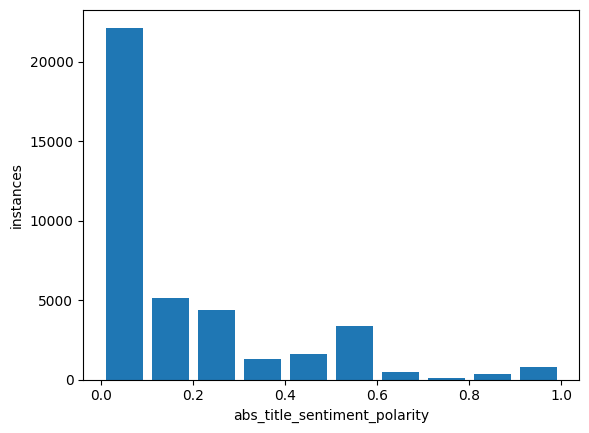

In [24]:
for i in cols[:-1]:
    if i not in gauss+categ:
        plt.figure()
        plt.hist(sms_df[i], range=(min(sms_df[i]), max(sms_df[i])),rwidth=0.8)
        plt.xlabel(i)
        plt.ylabel("instances")
plt.show

We notice that most of the variables have light tailed distributions, which means that there are not many data points taking values in the tail, as we said before these outliers will be trimmed from the dataset. Since the dataset is not large, we will not automatize this process, by taking data in a fixed range (using quantiles) for all the variables we might lose a lot of data points that are not outliers. Therefore we will remove the outliers manually just by observing the distributions above.

Heavy tailed distributions won't be trimmed as stated before but we will transform some of them to make them more friendly to use (better for training the models)

We notice as well that there are very few Gaussian-like distributions that were not detected in the previous section because of their multimodal nature. We will treat these as we did in the previous section (using the median value).

In [25]:
#tokens_content
sms_df = sms_df[sms_df.tokens_content < 2000]

#token_length
sms_df = sms_df[sms_df.token_length < 6]
sms_df = sms_df[sms_df.token_length > 3]

#unique_tokens
sms_df = sms_df[sms_df.unique_tokens < 100]

#non_stop_unique_tokens
sms_df = sms_df[sms_df.non_stop_unique_tokens < 100]

#hrefs
sms_df = sms_df[sms_df.hrefs < 40]

#self_hrefs
sms_df = sms_df[sms_df.self_refs < 12]

#imgs
sms_df = sms_df[sms_df.imgs < 20]

#videos
sms_df = sms_df[sms_df.videos < 6]

#kw_min_min
sms_df = sms_df[sms_df.kw_min_min < 10]

#kw_max_min
sms_df = sms_df[sms_df.kw_max_min < 3000]

#kw_avg_min
sms_df = sms_df[sms_df.kw_avg_min < 800]

#kw_min_max
sms_df = sms_df[sms_df.kw_min_max < 20000]

#kw_max_avg
sms_df = sms_df[sms_df.kw_max_avg < 10000]

#kw_max_avg
sms_df = sms_df[sms_df.kw_max_avg > 2000]

#kw_max_max
sms_df = sms_df[sms_df.kw_max_max > 650000]

#kw_avg_avg
sms_df = sms_df[sms_df.kw_avg_avg < 6000]

#kw_avg_avg
sms_df = sms_df[sms_df.kw_avg_avg > 1500]

#self_reference_min_shares
sms_df = sms_df[sms_df.self_reference_min_shares < 8000]

#self_reference_max_shares
sms_df = sms_df[sms_df.self_reference_max_shares < 15000]

#self_reference_avg_shares
sms_df = sms_df[sms_df.self_reference_avg_shares < 8000]

#global_rate_negative_words
sms_df = sms_df[sms_df.global_rate_negative_words < 0.055]

#global_rate_positive_words
sms_df = sms_df[sms_df.global_rate_positive_words < 0.1]

#min_positive_polarity
sms_df = sms_df[sms_df.min_positive_polarity < 0.3]

#avg_negative_polarity
sms_df = sms_df[sms_df.avg_negative_polarity > -0.5]

#avg_positive_polarity
sms_df = sms_df[sms_df.avg_positive_polarity < 0.6]
sms_df = sms_df[sms_df.avg_positive_polarity > 0.1]

#max_positive_polarity
sms_df = sms_df[sms_df.max_positive_polarity > 0.4]

#max_negative_polarity
sms_df = sms_df[sms_df.max_negative_polarity > -0.2]

#subjectivity
sms_df = sms_df[sms_df.subjectivity > 0.2]
sms_df = sms_df[sms_df.subjectivity < 0.75]

#title_sentiment_polarity
sms_df = sms_df[sms_df.title_sentiment_polarity > -0.75]
sms_df = sms_df[sms_df.title_sentiment_polarity < 0.75]

#rate_negative_words
sms_df = sms_df[sms_df.rate_negative_words < 0.7]

#rate_positive_words
sms_df = sms_df[sms_df.rate_positive_words > 0.3]

#non_stop_words
sms_df = sms_df[sms_df.non_stop_words > 0.1]

Gaussian-like distributions:

In [26]:
#unique_tokens
Q = sms_df["unique_tokens"].quantile(0.5)
sms_df["unique_tokens"] = np.where(sms_df["unique_tokens"] < 0.3, Q, sms_df["unique_tokens"])

#non_stop_unique_tokens
Q = sms_df["non_stop_unique_tokens"].quantile(0.5)
sms_df["non_stop_unique_tokens"] = np.where(sms_df["non_stop_unique_tokens"] <= 0.4, Q, sms_df["non_stop_unique_tokens"])

#subjectivity
Q = sms_df["subjectivity"].quantile(0.5)
sms_df["subjectivity"] = np.where(sms_df["subjectivity"] <= 0.1, Q, sms_df["subjectivity"])

#rate_positive_words
Q = sms_df["rate_positive_words"].quantile(0.5)
sms_df["rate_positive_words"] = np.where(sms_df["rate_positive_words"] <= 0.1, Q, sms_df["rate_positive_words"])

Now we plot the resulting distributions:

C:\Users\chaki\AppData\Local\Temp\ipykernel_115140\186281712.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<function matplotlib.pyplot.show(close=None, block=None)>

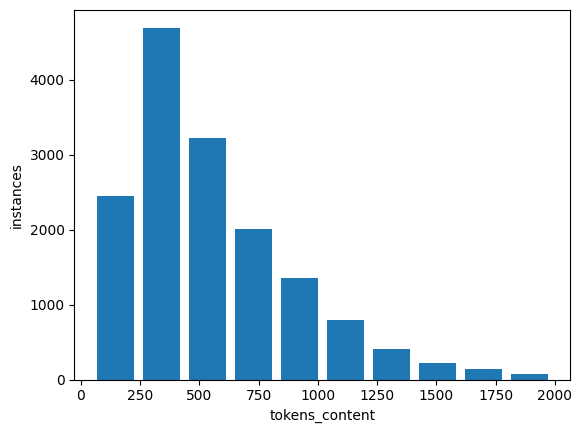

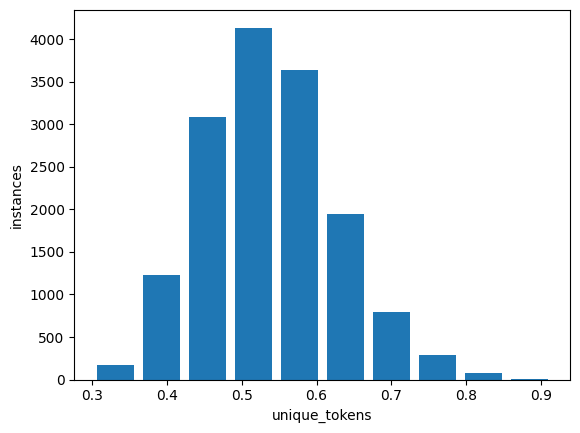

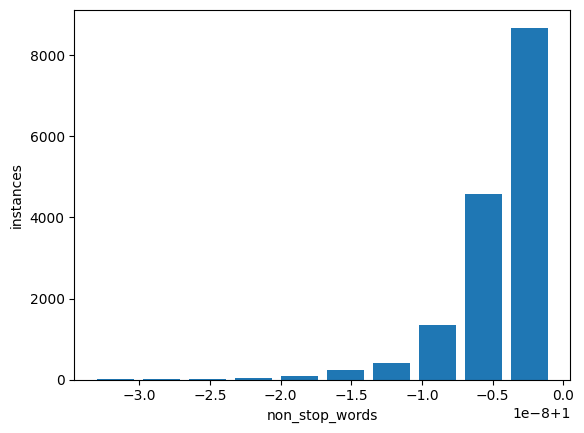

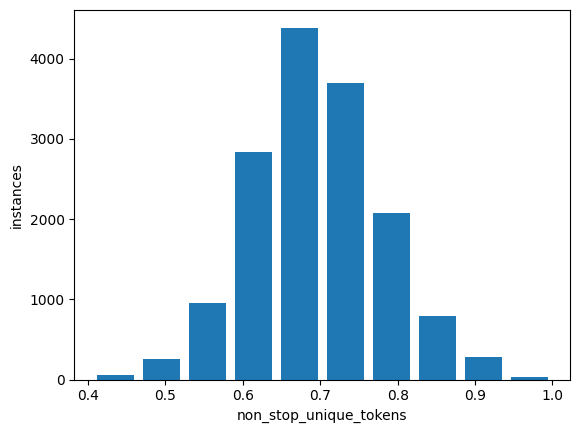

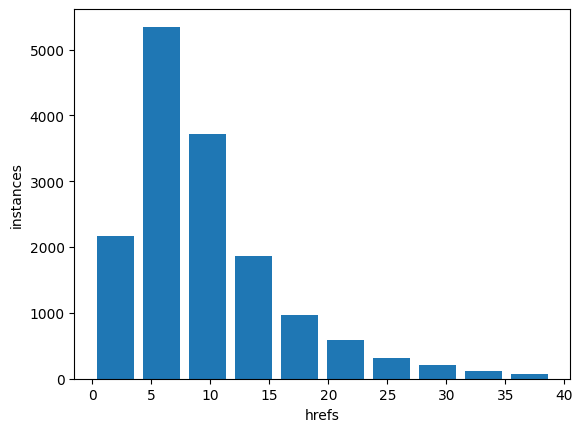

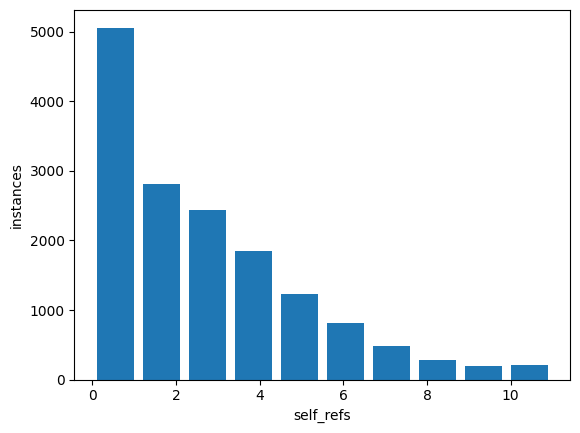

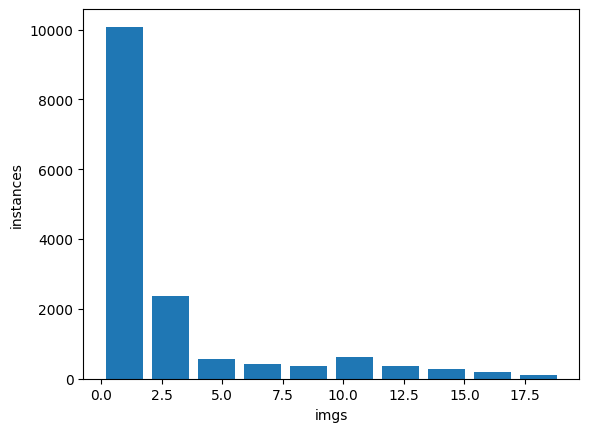

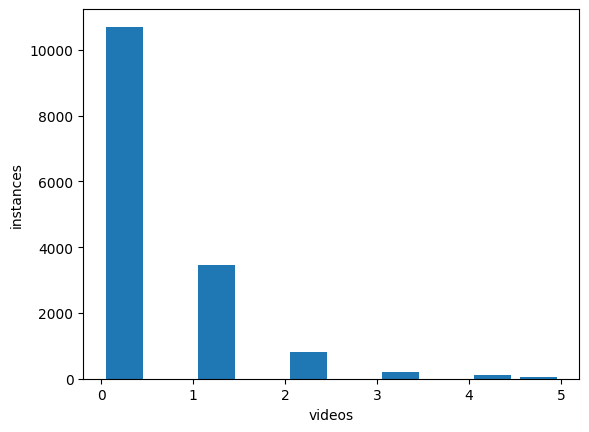

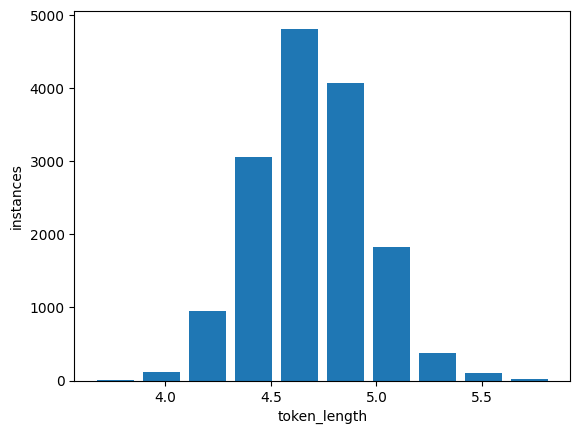

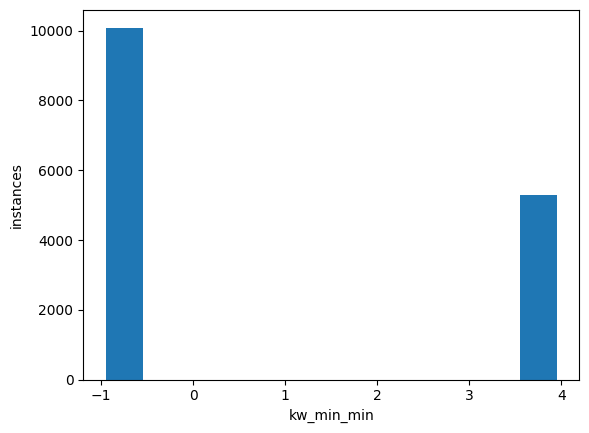

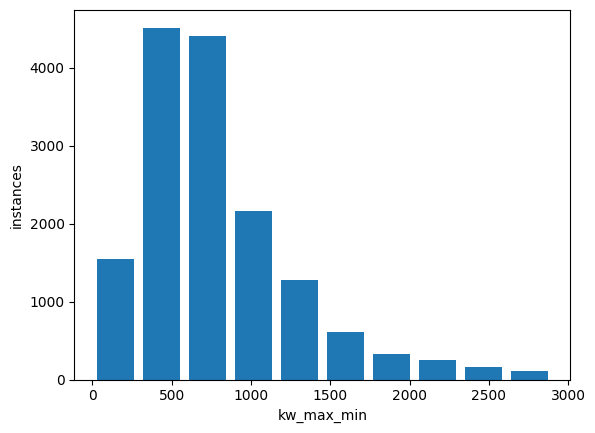

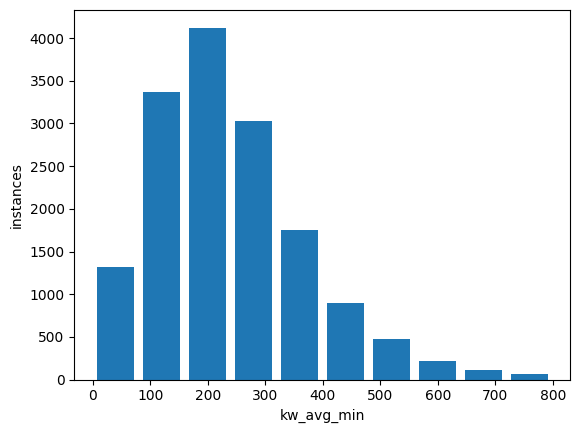

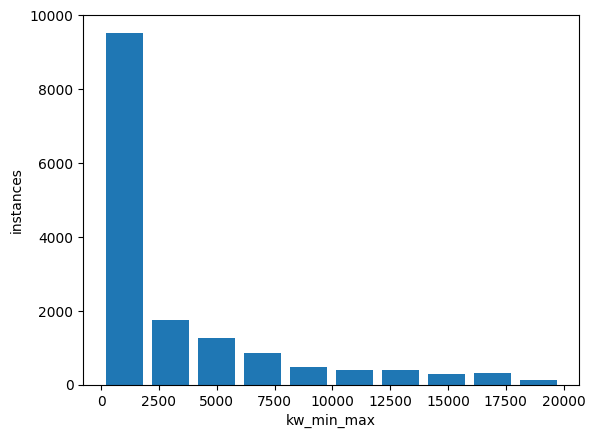

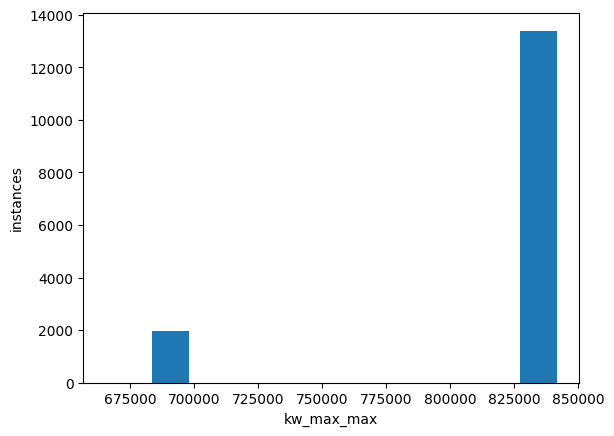

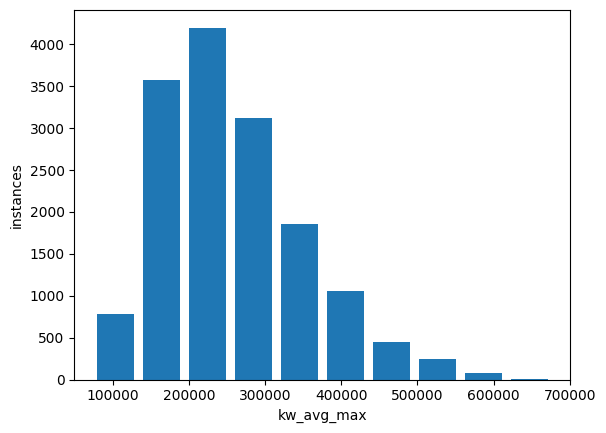

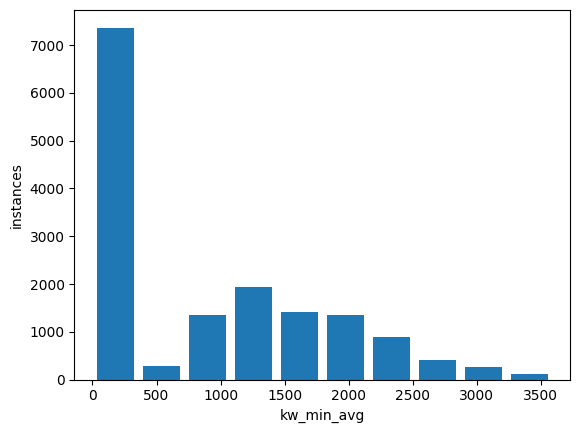

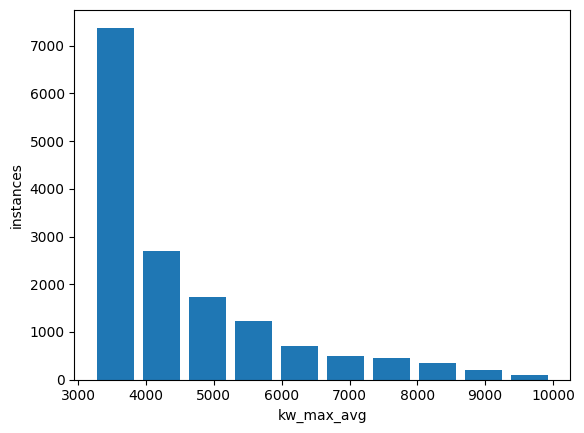

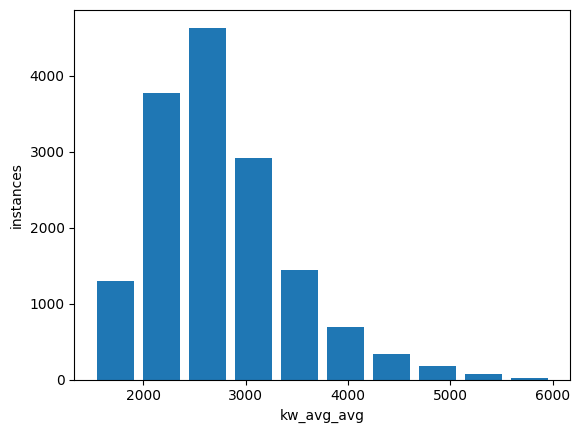

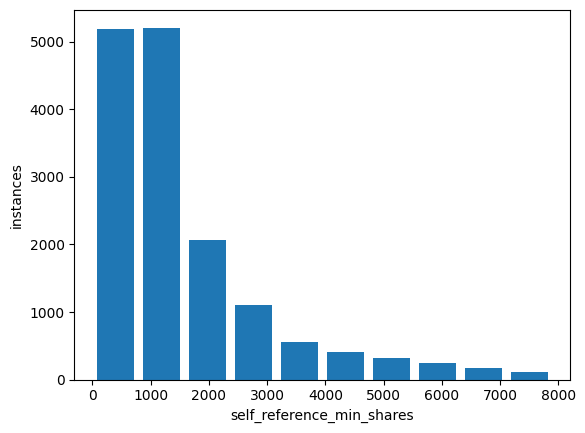

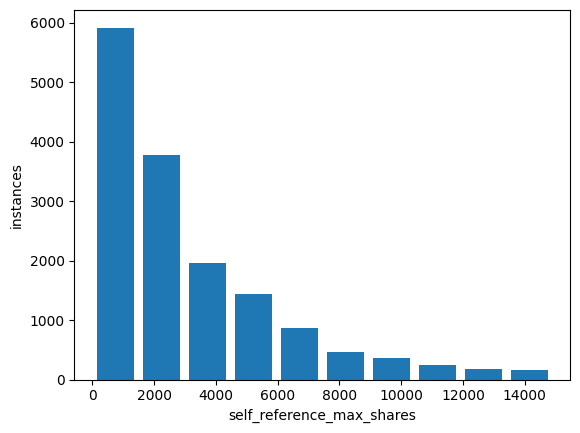

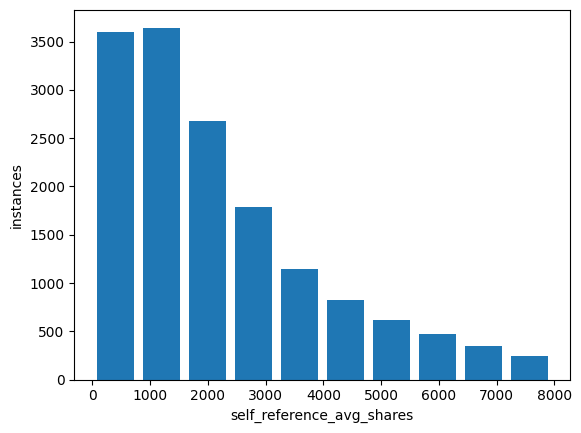

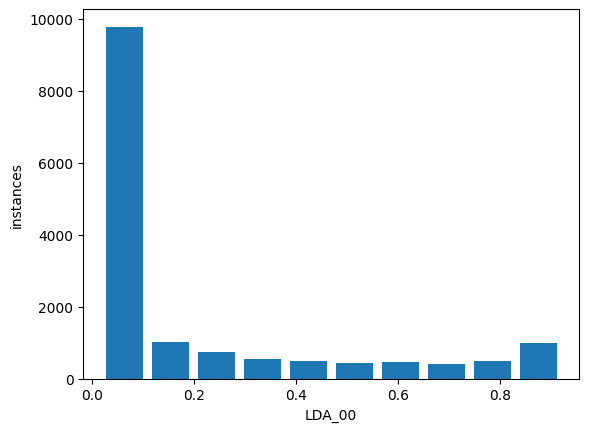

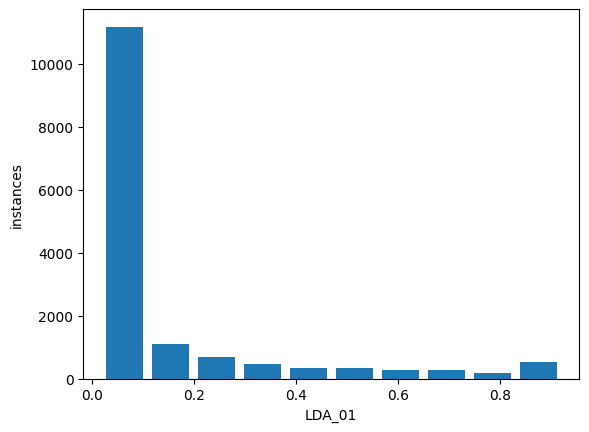

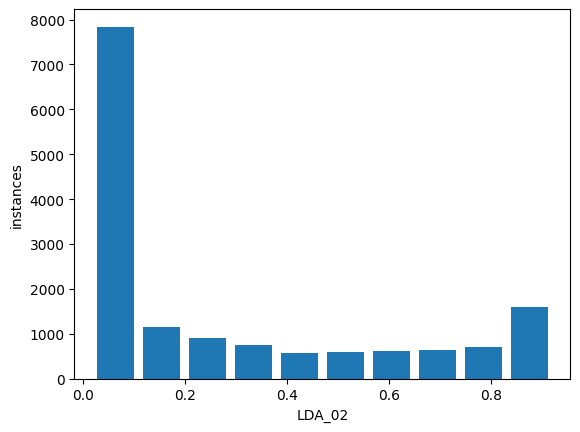

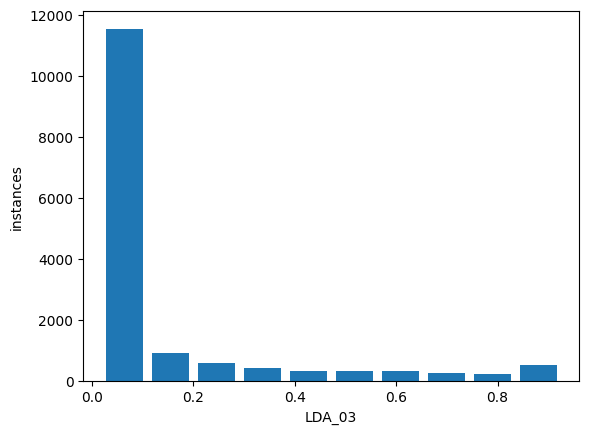

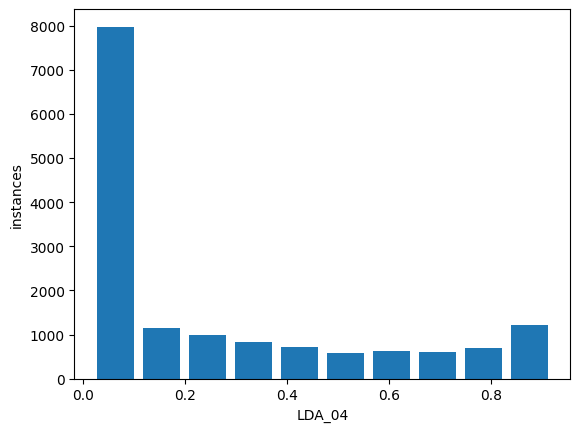

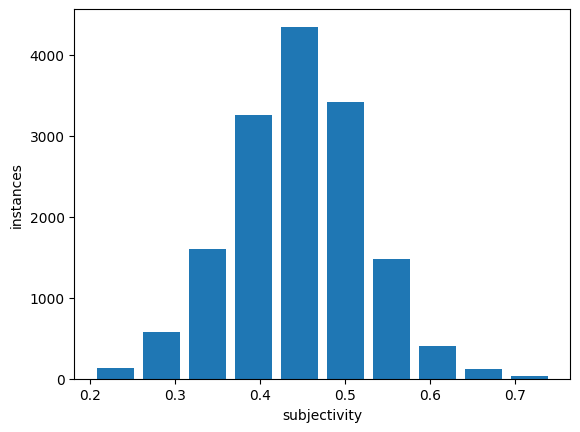

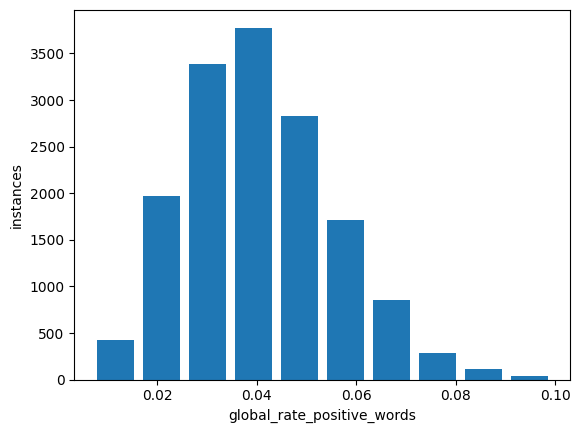

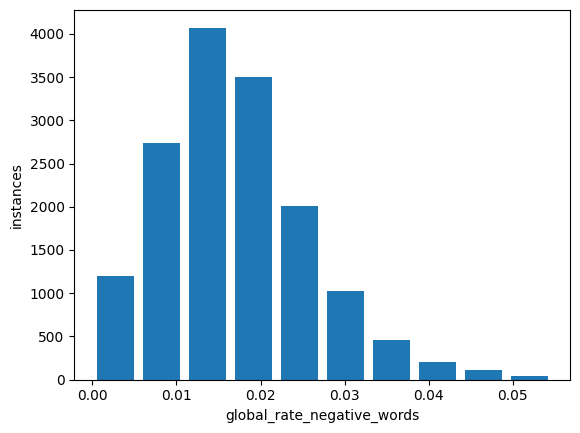

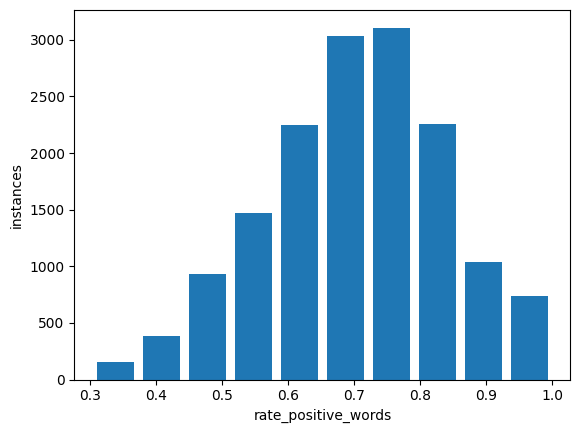

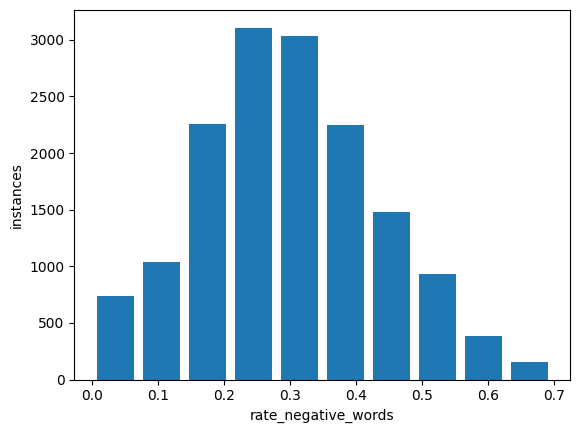

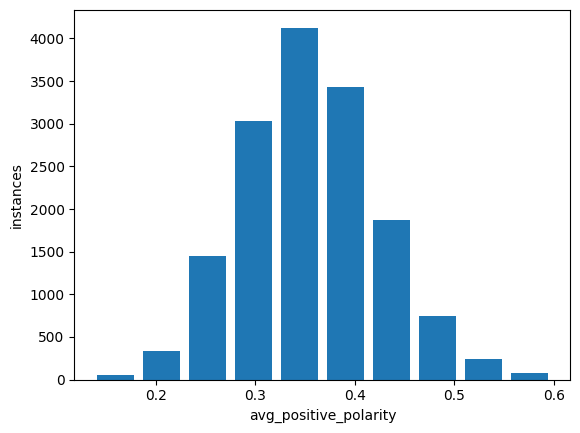

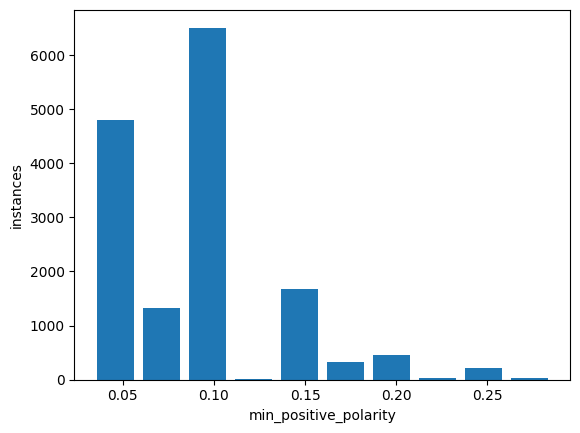

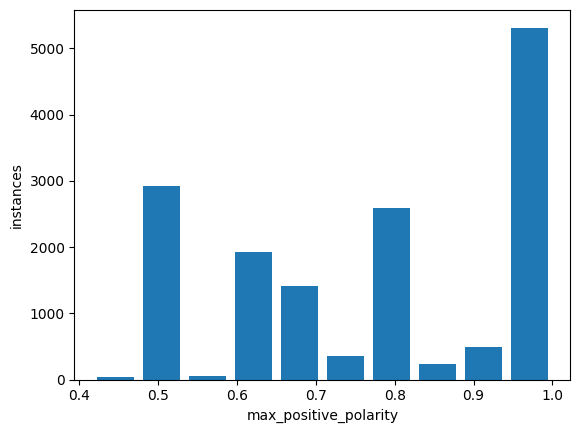

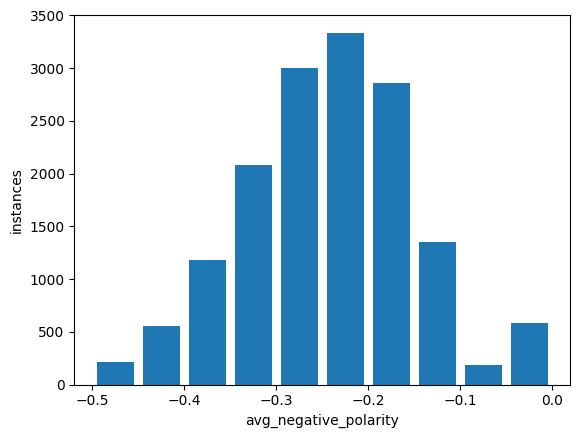

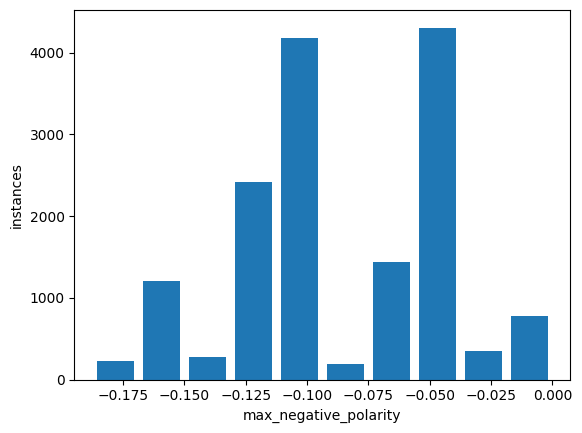

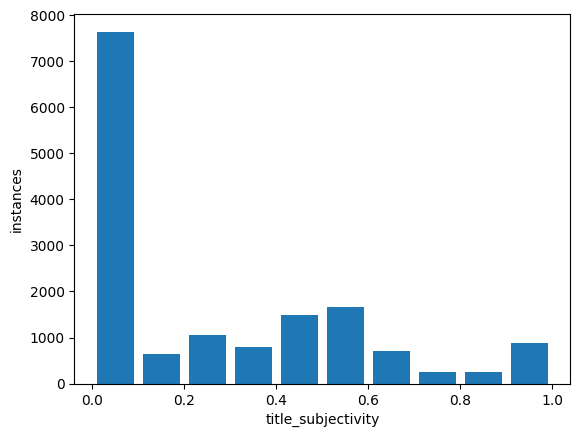

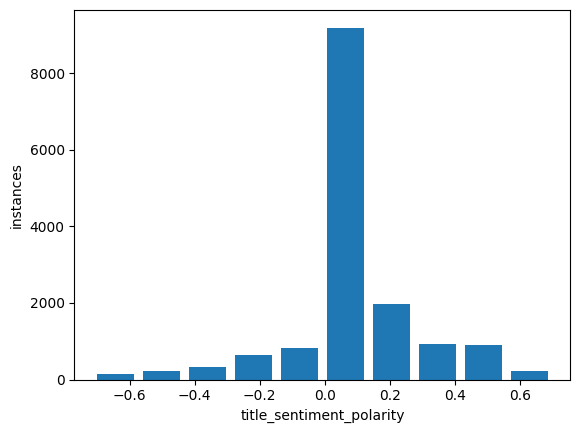

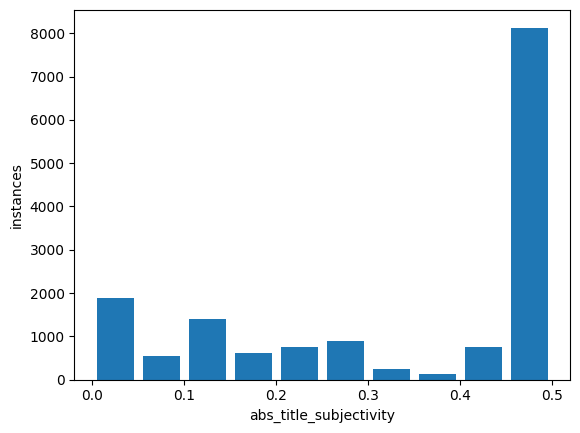

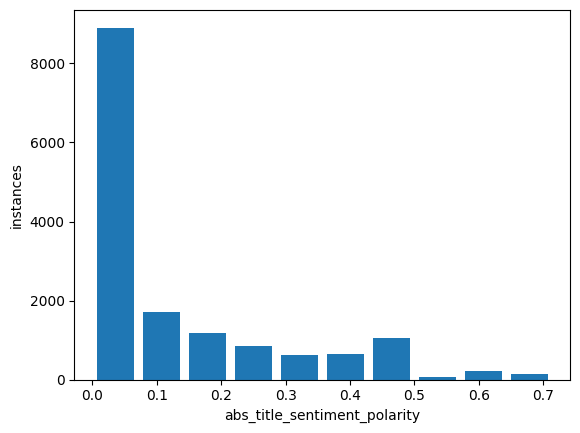

In [27]:
for i in cols[:-1]:
    if i not in categ+gauss:
        plt.figure()
        plt.hist(sms_df[i], range=(min(sms_df[i]), max(sms_df[i])),rwidth=0.8)
        plt.xlabel(i)
        plt.ylabel("instances")
plt.show

The improvement is evident, we notice that there are more variables with Gaussian-like distributions that we couldn't see before because of the presence of outliers. We also managed to correct them and remove the outliers for the long-tailed distributions.

On the other hand, there are still some variables having strange multimodal distributions, this may be due to the small size of our dataset. We will try to improve them by applying a variable tranformation.
Below we list the variables that should be transformed, we include the variables with heavy tailed distributions, then we use the log-tranformation. The log-transformation is the most common transformation used to correct and improve the distribution of variables, it consists in replacing each value $x$ in the column to transform with $f(x)$ where $f(x) = \begin{cases} log(x) &\text{ if }x >  0 \\ 0 &\text{ elsewhere } \end{cases}$

After transforming the variables we plot their distributions to see the results.

<function matplotlib.pyplot.show(close=None, block=None)>

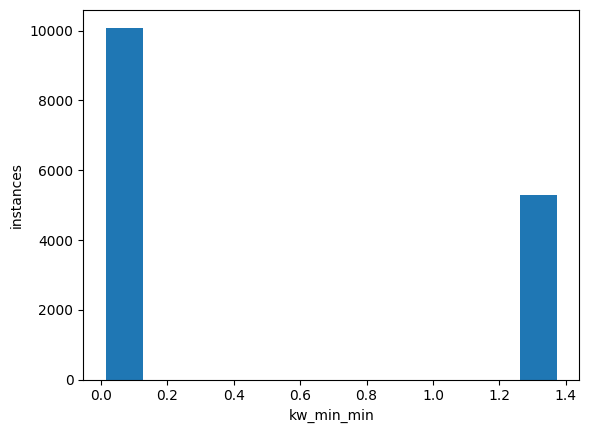

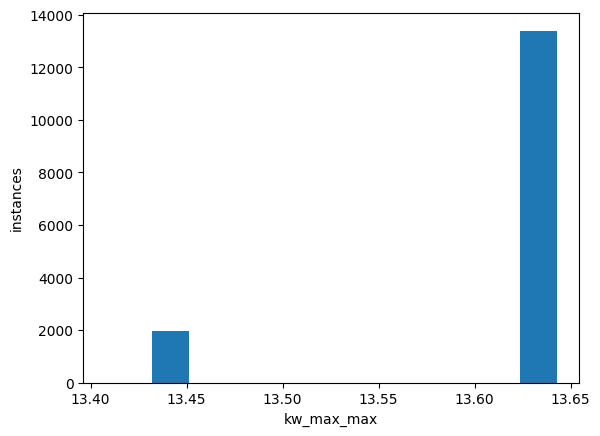

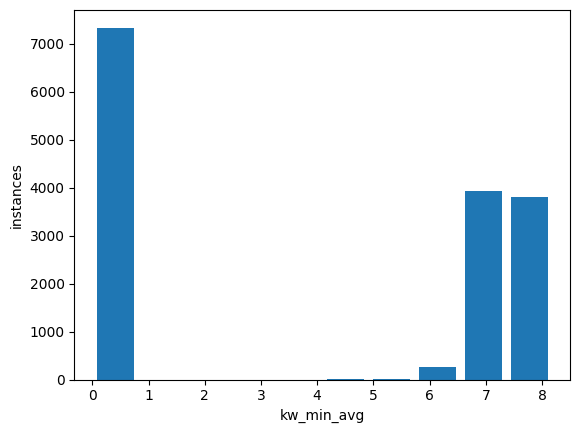

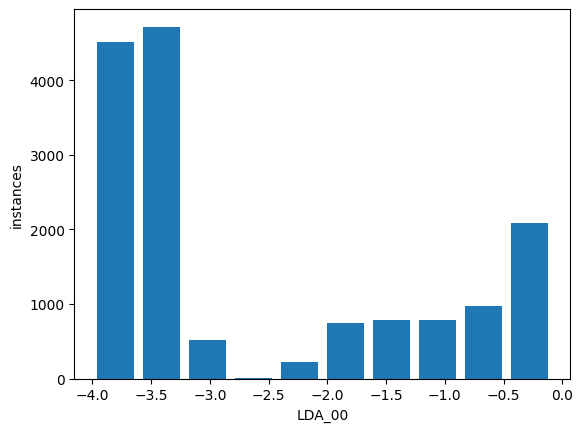

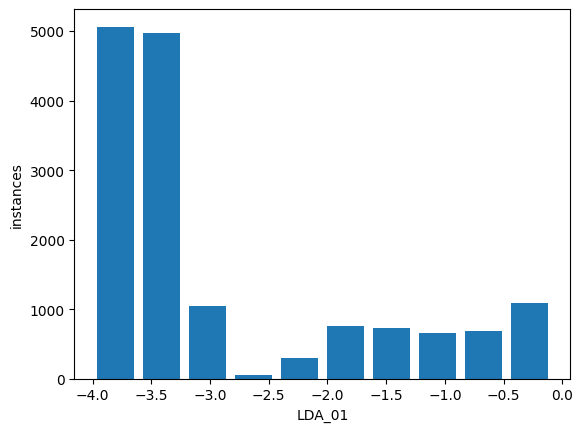

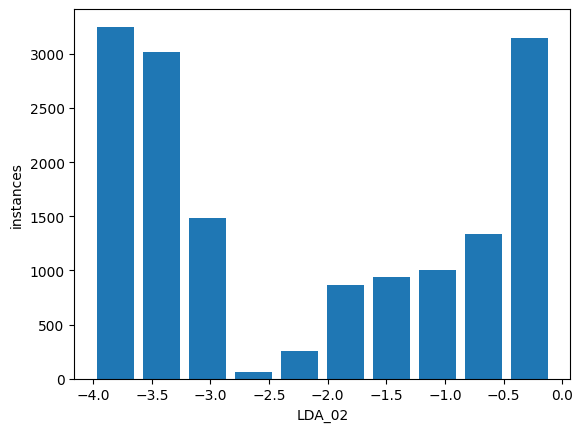

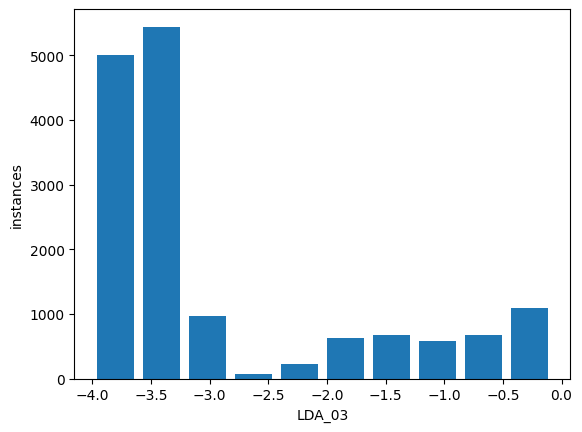

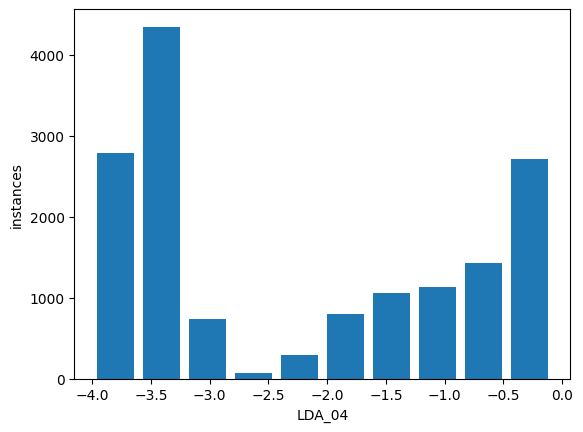

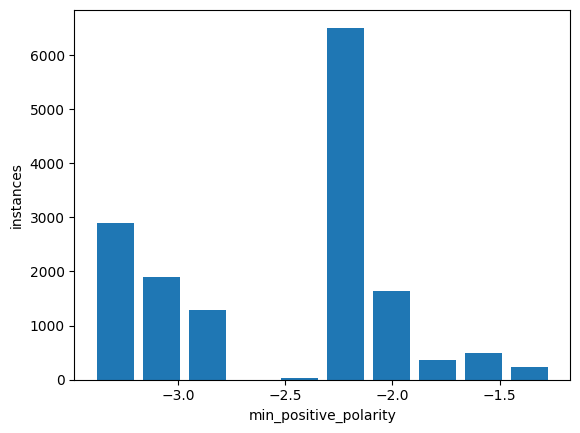

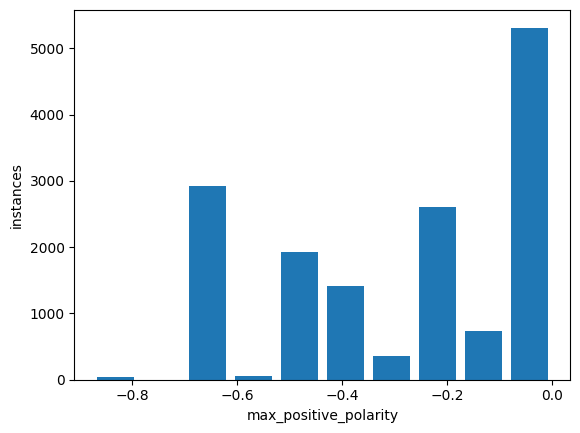

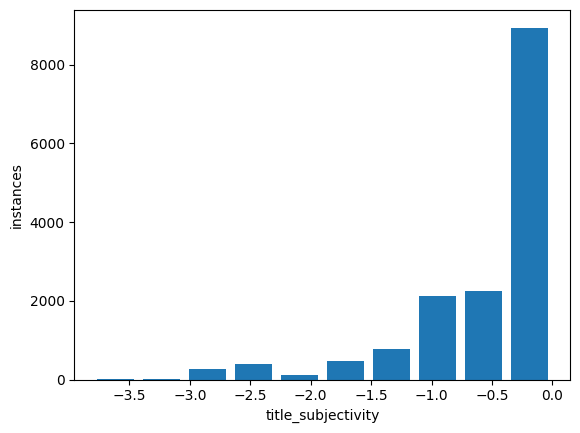

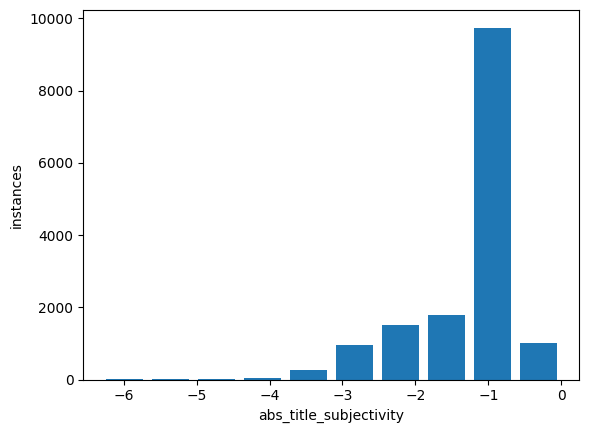

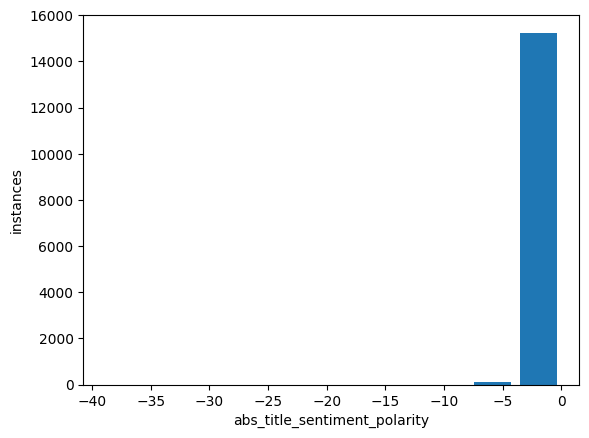

In [28]:
liste = ["kw_min_min",
         "kw_max_max",
         "kw_min_avg",
         "LDA_00",
         "LDA_01",
         "LDA_02",
         "LDA_03",
         "LDA_04",
         "min_positive_polarity",
         "max_positive_polarity",
         "title_subjectivity",
         "abs_title_subjectivity",
         "abs_title_sentiment_polarity"
        ]
for i in liste:
    sms_df[i] = sms_df[i].map(lambda x: np.log(x) if x > 0 else 0)
    plt.figure()
    plt.hist(sms_df[i], range=(min(sms_df[i]), max(sms_df[i])),rwidth=0.8)
    plt.xlabel(i)
    plt.ylabel("instances")
plt.show

Current size of the dataset:

In [29]:
sms_df.shape

(15369, 59)

### Removing outliers from the dependent variable

As we mentioned before, the dependent variable has outliers, few posts with very high shares, we want to prevent these outliers from unbalancing our model.
Given how much more frequent a range of number of shares, roughly from 0 to a bit under 5000, we should consider as outliers all those cases with a number of shares that occurs very rarely, since we don't have enough data (occurences) to process them.

<function matplotlib.pyplot.show(close=None, block=None)>

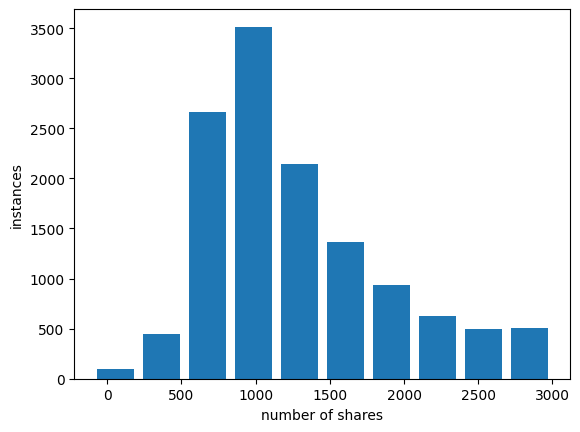

In [30]:
plt.hist(sms_df.shares,range=(-100,3000),rwidth=0.8)
plt.xlabel("number of shares")
plt.ylabel("instances")
plt.show

As we can see by looking at a subset of our dataset, we get this "wifi-bar" shape, this shape persists even after amplifying the range on this histogram, so we could make use of this subset for an outlier-free analysis. 

In [31]:
sms_v2 = sms_df[sms_df.shares < 2000]
sms_v2.shape

(10886, 59)

Let's proceed with the splitting.

# Feature scaling and creation of training and test set

In [32]:
X = sms_v2.iloc[:, :-1].values 
y = sms_v2.iloc[:, -1].values 

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

There are no categorical values, so we only want to scale our entries (no encoding).

In [34]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

pipeline = MinMaxScaler()

display(X_train[0])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

display(X_train[0]) 

array([ 1.10000000e+01,  3.35000000e+02,  4.70779219e-01,  9.99999995e-01,
        5.83333330e-01,  5.00000000e+00,  5.00000000e+00,  3.00000000e+00,
        0.00000000e+00,  4.46268657e+00,  4.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.18000000e+02,  1.32397500e+02,
        7.90000000e+03,  1.36450780e+01,  4.06950000e+05,  7.22886162e+00,
        3.82206145e+03,  3.03150651e+03,  2.00000000e+03,  4.40000000e+03,
        2.80000000e+03,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -2.23232315e-01, -2.99564639e+00, -2.99489730e+00,
       -2.99523918e+00, -2.99572654e+00,  4.41911765e-01,  1.33244207e-01,
        4.47761194e-02,  1.79104478e-02,  7.14285714e-01,  2.85714286e-01,
        4.06464646e-01, -1.99243016e+00,  0.00000000e+00, -2.05555556e-01,
       -5.00000000e-01, -

array([0.55555556, 0.1483971 , 0.27068324, 0.86378993, 0.29907678,
       0.12820513, 0.45454545, 0.15789474, 0.        , 0.37094716,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.10965517, 0.16688595,
       0.39698492, 1.        , 0.55254969, 0.88304718, 0.0904609 ,
       0.35751863, 0.25316456, 0.29530201, 0.35220126, 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.96429163, 0.24956991, 0.25387726,
       0.23907884, 0.25613091, 0.45863708, 0.49114963, 0.41717964,
       0.32878465, 0.59006211, 0.40993789, 0.57394703, 0.65571805,
       1.        , 0.58795242, 0.45070423, 0.28888889, 1.        ,
       0.50505051, 0.88943427, 1.        ])

We could've scaled the dependent variable as well, if we did that we would get smaller errors because the scaled values for the dependent value will be in a small range and therefore we won't be able to interpret the errors we get in a proper way, to do that we should perform the inverse-scaling of the predicted values. In the end, we chose to keep everything simple and not to scale it. Since we know the range of our dependent variable, it will be easier to evaluate our models.

In [35]:
X_train.shape

(8164, 58)

In [36]:
X_test.shape

(2722, 58)

We now have an outlier-less, feature-scaled training and test set to work on.

# First Regressions

Lets make a Validation set

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [40]:
X_val.shape

(1633, 58)

# Multi-Variable Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression 
mult_reg = LinearRegression()
mult_reg.fit(X_train, y_train)

LinearRegression()

In [52]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
y_pred_mr = mult_reg.predict(X_val)

mae_mr = mean_absolute_error(y_val,y_pred_mr)
mse_mr = mean_squared_error(y_val, y_pred_mr)
r2_mr = r2_score(y_val, y_pred_mr)

print("MSE : ", mse_mr)
print("MAE : ", mae_mr)
print("R^2:", r2_mr)


NameError: name 'mult_reg' is not defined

# Random forest

#### 10-fold cross validation using GridScearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = {'n_estimators': [100, 250, 500],
              'max_depth': [3, 5, 7],
              'max_features': ['auto', 'sqrt', 'log2'],}
regressor = RandomForestRegressor()

grid_search = GridSearchCV(regressor, param_grid, cv=10, scoring="neg_mean_absolute_error", verbose=10)
grid_search.fit(X_train,y_train)

In this part, we want to choose optimal combination of three hyperparameters yielding the best model.
These parameters are:
- `n_estimators`: indicating the number of trees in the forest.
- `max_depth`: indicating the maximum depth of the tree.
- `max_depth`: indicating the number of features to consider when looking for the best split.

#### Best parameters

In [ ]:
grid_search.best_params_
#this contains the best parameters (i.e. best avg. score)

#### An exteded report of the results is available

In [ ]:
grid_search.cv_results_
grid_table = pd.DataFrame(grid_search.cv_results_)
grid_table.head()

#### Best Random Forest regressor

In [ ]:
rf_reg = grid_search.best_estimator_

#### Fit the regressor with X_train and y_train data

In [ ]:
rf_reg.fit(X_train, y_train)

#### Predicting the Validation set results

In [ ]:
y_pred_rf = rf_reg.predict(X_val) 

#### Evaluation of the quality of our regressor

In [ ]:
# Results
mse_rf = mean_squared_error(y_val, y_pred_rf) # Evaluates the MSE
mae_rf = mean_absolute_error(y_val, y_pred_rf) # Evaluates the MAE
r2_rf = r2_score(y_val, y_pred_rf)

print("MSE:", mse_rf)
print("MAE:", mae_rf)
print("R^2:", r2_rf)

#### Features most relied on by the model

In [ ]:
feature_list = list(sms_v2.columns[:-1])
feature_imp = pd.Series(reg.feature_importances_, index=feature_list).sort_values

# ANN

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

#### Building the model

In this section we will build an ANN model in which we can choose the number of hidden layers, the kernel initializer for the layers and their activation function. These are all hyperparameters that can influence the output. Moreover, we include an option that specifies wether the number of neurons per layer is constant or decreasing since one may out-perform the other in a specific problem. Also, the optimal number of hidden neurons should be around the mean of the input and output size.

We add as well L1 and dropout regularizations as the first will help in the features selection and the second will make our model more robust.

In [42]:
def build_model(input_size=X_train.shape[1], num_hidden_layers=1, constant_num_neurons=False, initializer='uniform', activation_func='relu', p_dropout=0, L1=0):
    model = Sequential()
    if constant_num_neurons:
        model.add(Input(input_size,))
        for i in range(num_hidden_layers):
            model.add(Dense(int(input_size/2), kernel_initializer=initializer, activation=activation_func, kernel_regularizer=regularizers.L1(l1=L1)))
            model.add(Dropout(p_dropout))
        model.add(Dense(1, kernel_initializer=initializer, activation=activation_func))
    else:
        model.add(Input((input_size,)))
        for i in range(num_hidden_layers):
            neurons = int(((num_hidden_layers - i)*input_size)/(2*num_hidden_layers))
            model.add(Dense(neurons, kernel_initializer=initializer, activation=activation_func, kernel_regularizer=regularizers.L1(l1=L1)))
            model.add(Dropout(p_dropout))
        model.add(Dense(1, kernel_initializer=initializer, activation=activation_func))
    model.compile(loss='mean_absolute_error', optimizer='adam')

    return model

#### 10-fold cross validation using RandomSearchCV

Since the number of hyperparameters to test is large, we will use RandomSearchCV which will test the model with a given number of combinations of the hyperparameters and return the best model out of them, this is faster than using GridSearchCV but less precise since this latter tests all the possible combinations of hyperparameters unlike RandomSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'num_hidden_layers': [i for i in range(2, 6)],
              'constant_num_neurons': [True, False],
              'activation_func': ['relu'],
              'initializer': ['uniform'],
              "p_dropout": [0, 0.2, 0.5],
              "L1": [0, 1, 10, 100]
             }

In [ ]:
random_search = RandomizedSearchCV(
    estimator=KerasRegressor(build_model, verbose=0),
    param_distributions=param_grid,
    n_iter = 72,
    scoring='neg_mean_absolute_error',
    cv=10,
    verbose=3
)

These hyperparameters tu tune are:
- `num_hidden_layers`: indicating the number of hidden layers in the neural network.
- `constant_num_neurons`: indicating whether to use a constant or decreasing number of neurons per hidden layer.
- `p_dropout`: indicating the p value for dropout.
- `L1`: parameter regulating L1 regularization.

Warning: The following cell takes around 2 hours to run, but below it we have stored the results in a regressor

In [ ]:
random_search.fit(X_train,y_train, batch_size=32, epochs=100)

#### Best parameters

In [ ]:
random_search.best_params_
#this contains the best parameters (i.e. best avg. score)

Below are the results(without running CV)

In [ ]:
best_params = {'p_dropout': 0.2,
 'num_hidden_layers': 3,
 'initializer': 'uniform',
 'constant_num_neurons': True,
 'activation_func': 'relu',
 'L1': 0}

#### An exteded report of the results is available

In [ ]:
random_search.cv_results_
random_table = pd.DataFrame(random_search.cv_results_)
random_table.head()

#### Best regressor

In [ ]:
ann_reg = random_search.best_estimator_

Or use this(same, but can run without having ran the CV)

In [26]:
ann_reg = build_model(p_dropout=0.2,
 num_hidden_layers= 3,
 initializer= 'uniform',
 constant_num_neurons= True,
 activation_func= 'relu',
 L1= 0)

#### Fit the regressor with X_train and y_train data

In [27]:
ann_reg.fit(X_train, y_train)

205/205 [==============================] - 1s 855us/step - loss: 805.5477


#### Predicting the Validation set results

In [28]:
y_pred_neural = ann_reg.predict(X_val) 

52/52 [==============================] - 0s 550us/step


#### Evaluation of the quality of our regressor

In [29]:
mae_neural = mean_absolute_error(y_val, y_pred_neural)
mse_neural = mean_squared_error(y_val, y_pred_neural)
r2_neural = r2_score(y_val, y_pred_neural)

print("MSE : ", mse_neural)
print("MAE : ", mae_neural)
print("R^2:", r2_neural)

MSE :  152681.7808763384
MAE :  310.93742083743973
R^2: 0.004580158898403464


# Choice of the best model

In [4]:
d = {}
d['Multilinear Regression'] = [mae_mr, mse_mr, r2_mr]
d['Random forest'] = [mae_rf, mse_rf, r2_rf]
d['ANN'] = [mae_neural, mse_neural, r2_neural]
for i in d:
    d[i][0] = round(d[i][0], 2)
    d[i][1] = int(d[i][1])
dff = pd.DataFrame.from_dict(d)
dff.index = ['MAE', 'MSE', 'R^2']
dff

,Multilinear Regression,Random forest,ANN
MAE,1,0,7
MSE,1,0,6
R^2,1,0,4


Since we based our choices on MAE from the beginning (in cross validation...), we choose the model with the minimal MAE, so we will be working with ANN

We save the previous image as .png file

In [ ]:
import dataframe_image as dfi
dfi.export(dff, "images/table.png", dpi = 600)

# Performance on the test set

#### The regressor

In [31]:
regressor = ann_reg

#### Fitting the regressor

In [32]:
regressor.compile(optimizer = 'adam', loss = "MeanAbsoluteError")
regressor.fit(X_train, y_train, batch_size = 32 , epochs = 100)

Epoch 1/100
205/205 [==============================] - 1s 875us/step - loss: 795.0214 - mean_absolute_error: 795.0214
Epoch 2/100
205/205 [==============================] - 0s 894us/step - loss: 342.5528 - mean_absolute_error: 342.5528
Epoch 3/100
205/205 [==============================] - 0s 894us/step - loss: 339.5144 - mean_absolute_error: 339.5144
Epoch 4/100
205/205 [==============================] - 0s 894us/step - loss: 333.7934 - mean_absolute_error: 333.7934
Epoch 5/100
205/205 [==============================] - 0s 890us/step - loss: 332.9335 - mean_absolute_error: 332.9335
Epoch 6/100
205/205 [==============================] - 0s 880us/step - loss: 333.8055 - mean_absolute_error: 333.8055
Epoch 7/100
205/205 [==============================] - 0s 890us/step - loss: 324.9373 - mean_absolute_error: 324.9373
Epoch 8/100
205/205 [==============================] - 0s 880us/step - loss: 328.1248 - mean_absolute_error: 328.1248
Epoch 9/100
205/205 [==============================] - 0

#### Predicting the test set results

In [33]:
y_pred = regressor.predict(X_test) 

86/86 [==============================] - 0s 543us/step


#### Results

In [34]:
mse = mean_squared_error(y_test, y_pred) # Evaluates the MSE
mae = mean_absolute_error(y_test, y_pred) # Evaluates the MAE
r2 = r2_score(y_test,y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R-Squared:",r2)

MAE: 283.3645701860348
MSE: 130748.88496443741
R-Square: 0.11250735558012548


# Choice of the attributes

We will base our choice on the following:
- Correlation with the dependent variable
- Coefficients of the LASSO multilinear regression
- Important features for random forest

(We can't use ANN because it's complex to know what attributes were used and how they were used)

#### Correlation with the dependent variable

In [36]:
sms_df.corr().shares.sort_values()

LDA_02                         -0.067447
world                          -0.061135
token_length                   -0.037177
thursday                       -0.023323
non_stop_words                 -0.021620
entertainment                  -0.021344
rate_negative_words            -0.020255
wednesday                      -0.019580
LDA_01                         -0.016272
tokens_content                 -0.011693
bus                            -0.011580
max_negative_polarity          -0.010707
avg_negative_polarity          -0.006250
abs_title_subjectivity         -0.004988
self_refs                      -0.004803
global_rate_negative_words     -0.004426
tuesday                        -0.000874
non_stop_unique_tokens          0.000474
min_negative_polarity           0.000907
kw_min_min                      0.002182
tokens_title                    0.002960
kw_min_max                      0.003454
LDA_00                          0.003855
friday                          0.006904
min_positive_pol

#### Coefficients of the LASSO multilinear regression

In [37]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=5, positive=True)
lasso.fit(X_test, y_test)

Lasso(alpha=5, positive=True)

In [38]:
coefficients = pd.DataFrame({"Feature": sms_v2.columns[:-1], "Coefficients": np.transpose(lasso.coef_)})

In [39]:
coefficients

,Feature,Coefficients
0,tokens_title,0.000000
1,tokens_content,0.000000
2,unique_tokens,0.000000
3,non_stop_words,0.000000
4,non_stop_unique_tokens,0.000000
5,hrefs,0.000000
6,self_refs,0.000000
7,imgs,0.000000
8,videos,0.000000
9,token_length,0.000000


#### Important features for random forest

In [ ]:
print(feature_imp)

#### Choosing the attributes

Now we pick the attributes according to what it's listed above, we take independent variables that are highly correlated with the dependent variable, we take variables that are the most important for both the Random Forest regressor and LASSO Regressor (variables having coefficients different than 0 for this latter).
We get the following list:

In [60]:
attributes = ["tokens_content",
              "non_stop_words",
              "hrefs",
              "self_refs",
              "imgs",
              "socmed",
              "tech",
              "self_reference_avg_shares",
              "kw_max_max",
              "kw_avg_avg",
              "friday",
              "is_weekend",
              "LDA_00",
              "LDA_04",
              "subjectivity",
              "rate_positive_words",
             ]

attributes_ind = []
cols = sms_v2.columns
for i in range(len(cols)):
    if cols[i] in attributes:
        attributes_ind.append(i)

attributes_ind

[1, 3, 5, 6, 7, 14, 15, 21, 25, 28, 33, 36, 37, 41, 42, 46]

In [61]:
data = pd.DataFrame(sms_v2[attributes])
data

,tokens_content,non_stop_words,hrefs,self_refs,imgs,socmed,tech,self_reference_avg_shares,kw_max_max,kw_avg_avg,friday,is_weekend,LDA_00,LDA_04,subjectivity,rate_positive_words
5408,200,1.0,10,0,1,0,1,0.0,13.445026,2683.854071,0,0,-1.733872,-0.305102,0.416084,0.545455
5420,725,1.0,7,7,1,0,1,1232.0,13.445026,2969.085595,0,0,-3.552199,-0.121553,0.433923,0.736842
5421,333,1.0,4,2,1,0,1,5700.0,13.445026,2902.079090,0,0,-3.365218,-0.354886,0.480280,0.722222
5423,695,1.0,4,4,16,0,1,2289.5,13.445026,2598.789619,0,0,-1.962193,-0.416686,0.327580,0.857143
5427,189,1.0,4,2,1,0,1,961.0,13.445026,2657.250998,0,0,-3.549042,-0.820939,0.612500,0.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39632,580,1.0,15,2,3,0,0,1400.0,13.645078,2730.943979,0,0,-3.555089,-2.108860,0.428833,0.750000
39633,614,1.0,10,0,1,0,0,0.0,13.645078,2122.427735,0,0,-3.401164,-3.401161,0.469965,0.676471
39635,478,1.0,18,2,2,0,0,7200.0,13.645078,3929.218477,0,0,-0.143995,-3.401184,0.391249,0.700000
39641,442,1.0,24,1,12,0,0,1400.0,13.645078,4206.439195,0,0,-1.838823,-1.917527,0.510296,0.576923


Then we run our model using the selected attributes

In [62]:
reg = build_model(input_size = len(attributes_ind),
 num_hidden_layers = 3,
 initializer = 'uniform',
 constant_num_neurons = True,
 activation_func = 'relu',
 p_dropout = 0,
 L1 = 1)

In [63]:
reg.compile(optimizer = 'adam', loss = "MeanAbsoluteError")
reg.fit(X_train[:, attributes_ind], y_train, batch_size = 32 , epochs = 100)

Epoch 1/100
256/256 [==============================] - 2s 3ms/step - loss: 1070.1158
Epoch 2/100
256/256 [==============================] - 1s 2ms/step - loss: 1068.3794
Epoch 3/100
256/256 [==============================] - 1s 2ms/step - loss: 1066.1057
Epoch 4/100
256/256 [==============================] - 1s 2ms/step - loss: 1062.9105
Epoch 5/100
256/256 [==============================] - 1s 2ms/step - loss: 1058.4493
Epoch 6/100
256/256 [==============================] - 1s 2ms/step - loss: 1042.2107
Epoch 7/100
256/256 [==============================] - 1s 2ms/step - loss: 822.2192
Epoch 8/100
256/256 [==============================] - 0s 2ms/step - loss: 347.6859
Epoch 9/100
256/256 [==============================] - 1s 2ms/step - loss: 340.2657
Epoch 10/100
256/256 [==============================] - 1s 3ms/step - loss: 339.1877
Epoch 11/100
256/256 [==============================] - 1s 3ms/step - loss: 338.1962
Epoch 12/100
256/256 [==============================] - 1s 3ms/step 

In [64]:
y_pred = reg.predict(X_test[:,attributes_ind]) 

86/86 [==============================] - 0s 2ms/step


In [65]:
mse = mean_squared_error(y_test, y_pred) # Evaluates the MSE
mae = mean_absolute_error(y_test, y_pred) # Evaluates the MAE
r2 = r2_score(y_test,y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R-Squared:" ,r2)

MAE: 290.2534797438622
MSE: 131388.12172732208
R-Squared: 0.10816836695121879


## Second method to choose attributes

In bst we store the names of attributes 

In [38]:
bst = list(sms_v2.corr().shares.sort_values().index)

We selected some attributes to remove, basing ourselves on things like: remove max and min, keep avg, remove days of the week and keep weekend days

In [ ]:
rem = ["monday","tuesday","wednesday","thursday","friday","min_negative_polarity","max_negative_polarity","min_positive_polarity",
       "max_positive_polarity","kw_max_min","kw_max_max","kw_min_min","kw_min_max","kw_avg_min","kw_avg_max","LDA_01","LDA_02",
       "shares"

We would like to be more elaborate, so we are going to employ feature selection methods from sklearn.

In [111]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train,y_train)
mutual_info

array([0.00102705, 0.        , 0.01062987, 0.        , 0.0013189 ,
       0.        , 0.00439807, 0.01242286, 0.01153563, 0.        ,
       0.        , 0.00193816, 0.01099798, 0.        , 0.        ,
       0.00735009, 0.00211517, 0.01651801, 0.00818156, 0.00010936,
       0.00717454, 0.01743144, 0.00614563, 0.        , 0.01787444,
       0.02315322, 0.02460039, 0.02158322, 0.02589099, 0.00323192,
       0.00072972, 0.        , 0.01828315, 0.        , 0.01020947,
       0.01416269, 0.01946232, 0.01286582, 0.01109108, 0.00407241,
       0.00941705, 0.00919052, 0.00094808, 0.00278213, 0.00458983,
       0.0074213 , 0.01883463, 0.01715201, 0.        , 0.        ,
       0.00027507, 0.01637041, 0.        , 0.        , 0.00748676,
       0.        , 0.00555981, 0.        ])

Let's check for the most related features, values equal t zero mean independency fromt target variable

In [112]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = bst[:-1]
mutual_info.sort_values(ascending=False)

videos                          0.025891
non_stop_words                  0.024600
min_negative_polarity           0.023153
max_positive_polarity           0.021583
kw_max_min                      0.019462
imgs                            0.018835
tokens_content                  0.018283
bus                             0.017874
avg_positive_polarity           0.017431
kw_min_avg                      0.017152
max_negative_polarity           0.016518
self_reference_min_shares       0.016370
hrefs                           0.014163
subjectivity                    0.012866
unique_tokens                   0.012423
wednesday                       0.011536
kw_min_max                      0.011091
thursday                        0.010998
kw_min_min                      0.010630
kw_avg_min                      0.010209
LDA_00                          0.009417
kw_avg_max                      0.009191
abs_title_subjectivity          0.008182
tech                            0.007487
rate_positive_wo

We can also plot what we got as result

<AxesSubplot:>

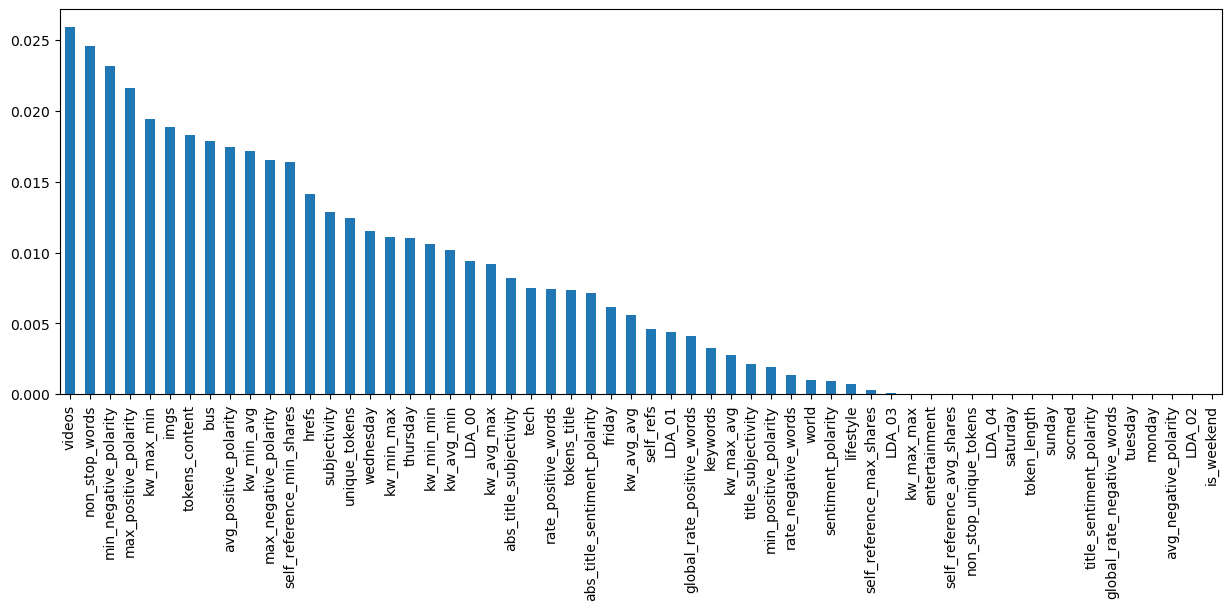

In [127]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

We notice six features who are supposedly independent from shares, so we should remove them

In [128]:
mut_infos = list(mutual_info.sort_values(ascending=False).index)
mutinf_feats = mut_infos[:-6]

Now we implement a function to get the index of a feature using its name.

In [120]:
def att_ind(lst):
    ret = []
    cols = sms_v2.columns
    for i in range(len(cols)):
        if cols[i] in lst:
            ret.append(i)
    return ret

Let's prep the features resulting as relevant from the mutual_information

In [121]:
mutinf_feats = att_ind(mut_inf)

Now lets put our best ANN regressor to work

In [122]:
reg = build_model(input_size = len(mutinf_feats),
 num_hidden_layers = 3,
 initializer = 'uniform',
 constant_num_neurons = True,
 activation_func = 'relu',
 p_dropout = 0,
 L1 = 1)

In [123]:
reg.compile(optimizer = 'adam', loss = "MeanAbsoluteError")
reg.fit(X_train[:,mutinf_feats], y_train, batch_size = 32 , epochs = 100)

Epoch 1/100
205/205 [==============================] - 1s 2ms/step - loss: 1079.4709 - mean_absolute_error: 1073.1790
Epoch 2/100
205/205 [==============================] - 0s 1ms/step - loss: 1070.7783 - mean_absolute_error: 1070.4425
Epoch 3/100
205/205 [==============================] - 0s 1ms/step - loss: 1065.3469 - mean_absolute_error: 1065.0109
Epoch 4/100
205/205 [==============================] - 0s 1ms/step - loss: 1057.4365 - mean_absolute_error: 1057.0990
Epoch 5/100
205/205 [==============================] - 0s 1ms/step - loss: 1046.3169 - mean_absolute_error: 1044.9886
Epoch 6/100
205/205 [==============================] - 0s 1ms/step - loss: 873.5145 - mean_absolute_error: 830.0647
Epoch 7/100
205/205 [==============================] - 0s 1ms/step - loss: 414.6893 - mean_absolute_error: 307.3443
Epoch 8/100
205/205 [==============================] - 0s 1ms/step - loss: 404.1249 - mean_absolute_error: 306.4105
Epoch 9/100
205/205 [==============================] - 0s 1ms/

205/205 [==============================] - 0s 1ms/step - loss: 323.2949 - mean_absolute_error: 286.7881
Epoch 72/100
205/205 [==============================] - 0s 1ms/step - loss: 322.8312 - mean_absolute_error: 286.8121
Epoch 73/100
205/205 [==============================] - 0s 1ms/step - loss: 322.5864 - mean_absolute_error: 286.8570
Epoch 74/100
205/205 [==============================] - 0s 1ms/step - loss: 322.1034 - mean_absolute_error: 286.7686
Epoch 75/100
205/205 [==============================] - 0s 1ms/step - loss: 321.6926 - mean_absolute_error: 286.6119
Epoch 76/100
205/205 [==============================] - 0s 1ms/step - loss: 321.3348 - mean_absolute_error: 286.7039
Epoch 77/100
205/205 [==============================] - 0s 1ms/step - loss: 320.9081 - mean_absolute_error: 286.4909
Epoch 78/100
205/205 [==============================] - 0s 1ms/step - loss: 320.6243 - mean_absolute_error: 286.6920
Epoch 79/100
205/205 [==============================] - 0s 1ms/step - loss: 3

In [124]:
y_pred = reg.predict(X_test[:,mutinf_feats]) 

86/86 [==============================] - 0s 1ms/step


In [126]:
mse = mean_squared_error(y_test, y_pred) # Evaluates the MSE
mae = mean_absolute_error(y_test, y_pred) # Evaluates the MAE
r2 = r2_score(y_test,y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R-Squared:" ,r2)

MAE: 285.6859384014009
MSE: 129887.11971808123
R-Square: 0.11835681515728214


The result is not too different from what we got in the past, so we could try narrowing down to the highest mutual_info scoring features, let's try the top 35 

In [129]:
top_mutinf = att_ind(mut_infos[35:])

In [130]:
reg = build_model(input_size = len(top_mutinf),
 num_hidden_layers = 3,
 initializer = 'uniform',
 constant_num_neurons = True,
 activation_func = 'relu',
 p_dropout = 0,
 L1 = 1)

In [133]:
reg.compile(optimizer = 'adam', loss = "MeanAbsoluteError")
reg.fit(X_train[:,top_mutinf], y_train, batch_size = 32 , epochs = 100)

Epoch 1/100
205/205 [==============================] - 1s 2ms/step - loss: 1074.4091 - mean_absolute_error: 1073.2799
Epoch 2/100
205/205 [==============================] - 0s 1ms/step - loss: 1071.4520 - mean_absolute_error: 1071.3899
Epoch 3/100
205/205 [==============================] - 0s 1ms/step - loss: 1067.7732 - mean_absolute_error: 1067.7108
Epoch 4/100
205/205 [==============================] - 0s 1ms/step - loss: 1062.4430 - mean_absolute_error: 1062.3809
Epoch 5/100
205/205 [==============================] - 0s 1ms/step - loss: 1055.3289 - mean_absolute_error: 1054.9742
Epoch 6/100
205/205 [==============================] - 0s 1ms/step - loss: 1025.2943 - mean_absolute_error: 1016.2341
Epoch 7/100
205/205 [==============================] - 0s 1ms/step - loss: 606.4205 - mean_absolute_error: 551.8358
Epoch 8/100
205/205 [==============================] - 0s 1ms/step - loss: 379.7585 - mean_absolute_error: 309.1690
Epoch 9/100
205/205 [==============================] - 0s 1m

Epoch 71/100
205/205 [==============================] - 0s 1ms/step - loss: 330.5733 - mean_absolute_error: 293.5693
Epoch 72/100
205/205 [==============================] - 0s 1ms/step - loss: 330.1654 - mean_absolute_error: 293.4727
Epoch 73/100
205/205 [==============================] - 0s 1ms/step - loss: 329.7015 - mean_absolute_error: 293.4449
Epoch 74/100
205/205 [==============================] - 0s 1ms/step - loss: 329.2819 - mean_absolute_error: 293.4266
Epoch 75/100
205/205 [==============================] - 0s 1ms/step - loss: 328.8652 - mean_absolute_error: 293.4364
Epoch 76/100
205/205 [==============================] - 0s 1ms/step - loss: 328.5252 - mean_absolute_error: 293.3401
Epoch 77/100
205/205 [==============================] - 0s 1ms/step - loss: 328.2654 - mean_absolute_error: 293.4333
Epoch 78/100
205/205 [==============================] - 0s 1ms/step - loss: 328.0502 - mean_absolute_error: 293.4278
Epoch 79/100
205/205 [==============================] - 0s 1ms/s

In [134]:
y_pred = reg.predict(X_test[:,top_mutinf]) 

86/86 [==============================] - 0s 1ms/step


In [135]:
mse = mean_squared_error(y_test, y_pred) # Evaluates the MSE
mae = mean_absolute_error(y_test, y_pred) # Evaluates the MAE
r2 = r2_score(y_test,y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R-Squared:" ,r2)

MAE: 293.3084564769557
MSE: 135488.5209063217
R-Square: 0.08033582282254603


Mutual info hasn't proved itself very successful, we will stick with the list of attributes we got in the first part, the model doesn't improve in terms of errors (pretty much same performance), but the number of attributes is lower and this means that the model will be faster and will need less computational power.

We now emplloy our best regressor

In [54]:
reg = build_model(input_size = len(attributes_ind),
 num_hidden_layers = 3,
 initializer = 'uniform',
 constant_num_neurons = True,
 activation_func = 'relu',
 p_dropout = 0,
 L1 = 1)

In [55]:
reg.compile(optimizer = 'adam', loss = "MeanAbsoluteError")
reg.fit(X_train[:,attributes_ind], y_train, batch_size = 32 , epochs = 100)

Epoch 1/100
256/256 [==============================] - 2s 2ms/step - loss: 1070.2902 - mean_absolute_error: 1069.5054
Epoch 2/100
256/256 [==============================] - 1s 2ms/step - loss: 1067.6329 - mean_absolute_error: 1067.5831
Epoch 3/100
256/256 [==============================] - 1s 3ms/step - loss: 1064.0168 - mean_absolute_error: 1063.9677
Epoch 4/100
256/256 [==============================] - 1s 2ms/step - loss: 1058.8650 - mean_absolute_error: 1058.8131
Epoch 5/100
256/256 [==============================] - 1s 3ms/step - loss: 1048.6926 - mean_absolute_error: 1046.8649
Epoch 6/100
256/256 [==============================] - 1s 2ms/step - loss: 832.3933 - mean_absolute_error: 807.6615
Epoch 7/100
256/256 [==============================] - 1s 2ms/step - loss: 356.7255 - mean_absolute_error: 302.0394
Epoch 8/100
256/256 [==============================] - 1s 2ms/step - loss: 355.0448 - mean_absolute_error: 300.8821
Epoch 9/100
256/256 [==============================] - 1s 2ms/

256/256 [==============================] - 1s 3ms/step - loss: 327.6423 - mean_absolute_error: 291.8386
Epoch 72/100
256/256 [==============================] - 1s 3ms/step - loss: 327.1481 - mean_absolute_error: 291.7996
Epoch 73/100
256/256 [==============================] - 1s 3ms/step - loss: 326.6528 - mean_absolute_error: 291.8438
Epoch 74/100
256/256 [==============================] - 1s 3ms/step - loss: 325.8983 - mean_absolute_error: 291.7161
Epoch 75/100
256/256 [==============================] - 1s 2ms/step - loss: 325.2209 - mean_absolute_error: 291.6360
Epoch 76/100
256/256 [==============================] - 1s 2ms/step - loss: 324.5568 - mean_absolute_error: 291.8042
Epoch 77/100
256/256 [==============================] - 1s 2ms/step - loss: 323.8467 - mean_absolute_error: 291.8564
Epoch 78/100
256/256 [==============================] - 1s 2ms/step - loss: 322.8672 - mean_absolute_error: 291.5108
Epoch 79/100
256/256 [==============================] - 1s 3ms/step - loss: 3

In [56]:
y_pred = reg.predict(X_test[:,attributes_ind]) 

86/86 [==============================] - 0s 2ms/step


In [57]:
mse = mean_squared_error(y_test, y_pred) # Evaluates the MSE
mae = mean_absolute_error(y_test, y_pred) # Evaluates the MAE
r2 = r2_score(y_test,y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R-Squared:", r2)

MAE: 290.25690085181935
MSE: 132767.75456975112
R-Squared: 0.09880374407134573


In [38]:
dill.dump_session('notebook_ai.db')